In [288]:
#from google.colab import drive
#drive.mount('/content/drive')

# PREPARATION

In [289]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [290]:
#df = pd.read_csv('/content/drive/MyDrive/marketing_campaign.csv', sep=";")
df = pd.read_csv('marketing_campaign.csv', sep=";")
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  2012-09-04       58       635         88              546              172   
1  2014-03-08       38        11          1                6                2   
2  2013-08-21       26       426         49              127              111   
3  2014-02-10       26        11          4               20               10   
4  2014-01-19       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0

# EDA - STAGE 1

In [291]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [292]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [293]:
df['Income'] = df['Income'].fillna((df['Income'].median()))
df['Income'].isna().sum()

0

In [294]:
#total campaign accepted
df['AcceptedCmptot'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] +df['AcceptedCmp5']

#Age : this year (example 2014) - Year birth
df['Age'] = 2014 - df['Year_Birth']

#customer month
df['Customer_Months'] = (pd.to_datetime("2014-12-31") - pd.to_datetime(df['Dt_Customer'])) // np.timedelta64(1,'M')

df.sample(5)

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
253   2227        1958    2n Cycle       Together  26490.0        0         0   
2122  7532        1980  Graduation        Married  43586.0        0         1   
473   6619        1978  Graduation        Married  38415.0        1         1   
682     75        1982    2n Cycle       Together  41039.0        0         0   
1326  7937        1982  Graduation        Married  24711.0        0         0   

     Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
253   2012-09-22       92        45         47               52   
2122  2012-08-30       26        99          2               11   
473   2013-01-02       91        22          1               13   
682   2013-07-25       32        34         11              137   
1326  2014-04-18       86        10          7               25   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
253                21                20            25                  2   
2122                4                 0            16                  3   
473                 4                 0             4                  2   
682               179                61            45                  1   
1326                6                 3             7                  1   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
253                 3                    1                  5   
2122                3                    0                  4   
473                 1                    0                  3   
682                 8                    1                  5   
1326                3                    0                  3   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
253                   6             0             0             0   
2122                  8             0             0             0   
473                   7             0             0             0   
682                   8             0             0             0   
1326                  7             0             0             0   

      AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  \
253              0             0         0              3         11   
2122             0             0         0              3         11   
473              0             0         0              3         11   
682              0             0         0              3         11   
1326             0             0         0              3         11   

      Response  AcceptedCmptot  Age  Customer_Months  
253          0               0   56               27  
2122         0               0   34               28  
473          0               0   36               23  
682          0               0   32               17  
1326         0               0   32                8

In [295]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'AcceptedCmptot', 'Age', 'Customer_Months'],
      dtype='object')

In [296]:
print(df['Marital_Status'].value_counts())
print(df['Education'].value_counts())

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64


In [297]:
# kategori YOLO, Alone, Absurd pada marital_status dimasukkan ke dalam kategori Single karena memiliki pengertian yang sama
df = df.replace({'Marital_Status' : {'YOLO' : 'Single', 'Alone' : 'Single', 'Absurd' : 'Single'}})

df = df.replace({'Education' : {'Basic' : 'Elementary', '2n Cycle' : 'Middle-High'}})

print(df['Education'].value_counts())
print(df['Marital_Status'].value_counts())

Graduation     1127
PhD             486
Master          370
Middle-High     203
Elementary       54
Name: Education, dtype: int64
Married     864
Together    580
Single      487
Divorced    232
Widow        77
Name: Marital_Status, dtype: int64


## Descriptive Statistics

In [298]:
df.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2240.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52237.975446     0.444196     0.506250   
std     3246.662198    11.984069   25037.955891     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35538.750000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68289.750000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
count      2240.000000       2240.000000   2240.000000        2240.000000   
mean         37.525446         27.062946     44.021875           2.325000   
std          54.628979         41.280498     52.167439           1.932238   
min           0.000000          0.000000      0.000000           0.000000   
25%           3.000000          1.000000      9.000000           1.000000   
50%          12.000000          8.000000     24.000000           2.000000   
75%          50.000000         33.000000     56.000000           3.000000   
max         259.000000        263.000000    362.000000          15.000000   

       NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
count      2240.000000          2240.000000        2240.000000   
mean          4.084821             2.662054           5.790179   
std           2.778714             2.923101           3.250958   
min           0.000000             0.000000           0.000000   
25%           2.000000             0.000000           3.000000   
50%           4.000000             2.000000           5.000000   
75%           6.000000             4.000000           8.000000   
max          27.000000            28.000000          13.000000   

       NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
count        2240.000000   2240.000000   2240.000000   2240.000000   
mean            5.316518      0.072768      0.074554      0.072768   
std             2.426645      0.259813      0.262728      0.259813   
min             0.000000      0.000000      0.000000      0.000000   
25%             3.000000      0.000000      0.000000      0.000000   
50%             6.000000      0.000000      0.000000      0.000000   
75%             7.000000      0.000000      0.000000      0.000000   
max            20.000000      1.000000      1.000000      1.000000   

       AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  Z_Revenue  \
count   2240.000000   2240.000000  2240.000000         2240.0     2240.0   
mean       0.064286      0.013393     0.009375            3.0       11.0   
std        0.245316      0.114976     0.096391            0.0        0.0   
min        0.000000      0.000000     0.000000            3.0       11.0   
25%        0.000000      0.000000     0.000000            3.0       11.0   
50%        0.000000      0.000000     0.000000            3.0       11.0   
75%        0.000000      0.000000     0.000000            3.0       11.0   
max        1.000000      1.000000     1.000000            3.0       11.0   

          Response  AcceptedCmptot          Age  Customer_Months  
count  2240.000000     2240.000000  2240.000000      2240.000000 

- Tidak terdapat nilai duplikat pada data
- Semua tipe data sudah sesuai kecuali pada variabel Dt_Customer sehingga diconvert menjadi date type kemudian dibuat variabel baru untuk mendapatkan lama customer join ke company
- Variabel income memiliki mean dan median yang hampir sama, namun nilai max yang sangat tinggi menunjukkan adanya indikasi outlier
- Tidak ada nilai statistika yang aneh pada variabel kidhome, teenhome, dan recency
- Pada variabel amount spent on products terlihat bahwa SEMUA PRODUK memiliki mean yang lebih besar dari median yang menandakan pola distribusi positively skewed
- Sementara itu, tidak terjadi keanehan nilai statistik pada number of purchase
- Meskipun variabel age tidak menunjukkan statistik yang aneh, namun terlihat bahwa usia customer tertua yaitu 121 tahun dimana nilai ini sangat jauh dari rata-rata
- Variabel customer_months memiliki pola distribusi yang simetris, dapat dilihat dari nilai mean median yang hampir sama
- Kolom Z_CostContact dan Z_Revenue tidak dimasukkan dalam pemodelan karena mengandung nilai yang sama
- Terdapat missing value pada variabel income sebanyak 1.07 %, dilakukan imputasi menggunakan median

## Univariate Analysis

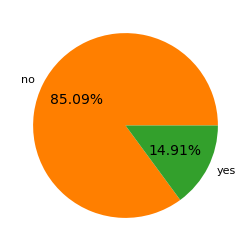

In [299]:
df['ResponseGroup'] = np.where(df['Response'] == 0, 'no', 'yes')

df.groupby(['ResponseGroup'])['ID'].count().plot(kind='pie', colors=['#ff7f00', '#33a02c'], autopct='%1.2f%%', figsize=(3,3))
plt.ylabel(None)
plt.show()

In [300]:
df = df.drop(columns=['ResponseGroup']).copy()

In [301]:
demographic = ['Income', 'Age', 'Kidhome', 'Teenhome', 'Recency', 'Customer_Months', 'AcceptedCmptot' ]
spent = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
purchase = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

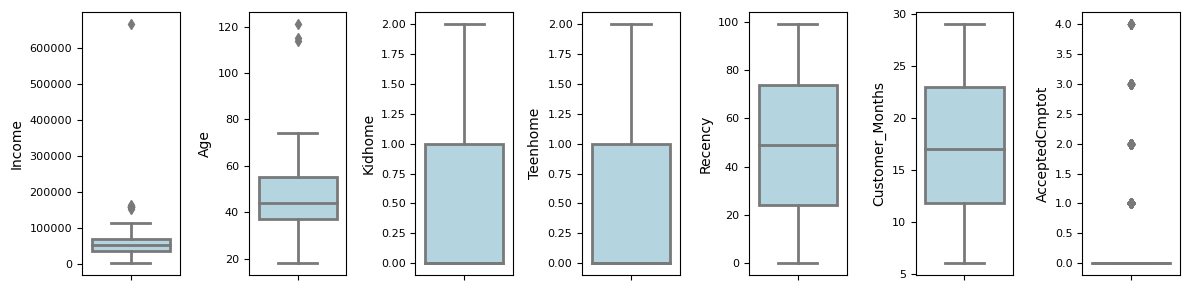

In [302]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 3
rcParams['lines.linewidth'] = 2
rcParams['xtick.labelsize'] = 8
rcParams['ytick.labelsize'] = 8

for i in range(0, len(demographic)):
    plt.subplot(1, len(demographic), i+1)
    sns.boxplot(y=df[demographic[i]], color='lightblue', orient='v')
    plt.tight_layout()

- Terlihat adanya outlier pada income dan age
- Recency dan customer month terlihat memiliki pola distribusi yang simetris

In [303]:
#making function to replace outlier
def outlier (x):
    sorted(x)
    q1, q3 = x.quantile([0.25, 0.75])
    IQR = q3 - q1
    lwr_bound = q1 - (1.5*IQR)
    upr_bound = q3 + (1.5*IQR)
    return lwr_bound, upr_bound

In [304]:
df['Income_new'] = df['Income']
low, high = outlier(df['Income_new'])

#replacing outlier with upper bound and lower bound value
df['Income_new'] = np.where(df['Income_new']>high, high, df['Income_new'])
df['Income_new'] = np.where(df['Income_new']<low, low, df['Income_new'])

In [305]:
fig, axes = plt.subplots(1, 2, figsize=(10,3))

sns.boxplot(ax=axes[0], data = df['Income_new'])
sns.histplot(ax=axes[1], data = df, x = "Income_new", kde = True, stat = "probability", bins=int(80/5))
plt.show()

In [306]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 3
rcParams['lines.linewidth'] = 2
rcParams['xtick.labelsize'] = 8
rcParams['ytick.labelsize'] = 8

for i in range(0, len(spent)):
    plt.subplot(1, len(spent), i+1)
    sns.boxplot(y=df[spent[i]], color='lightblue', orient='v')
    plt.tight_layout()

Dari penggambaran boxplot diketahui bahwa amount spent untuk produk Wine memiliki nilai tertinggi, dimana sebaran data dari 0 - 500 sampai memiliki customer outlier dengan pembelian mencapai 1200 - 1400 dollar.

Dari visual boxplot juga diketahui bahwa persebaran setiap produk memiliki pola right skewness dimana nilai mean lebih besar dari median dengan frekuensi terbesar untuk pembelian Wine berada pada range 180. Berdasarkan boxplot diatas customer sangat menyukai produk wine dari store ini sehingga menjadi peluang untuk campaign selanjutnya mempromosikan Wine.

In [307]:
#Analisis Untuk Amount Spent dari customer untuk setiap produk
df1 = pd.DataFrame(data=df, columns=spent)
nd = pd.melt(df1, value_vars =df1 )
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
plt.show()

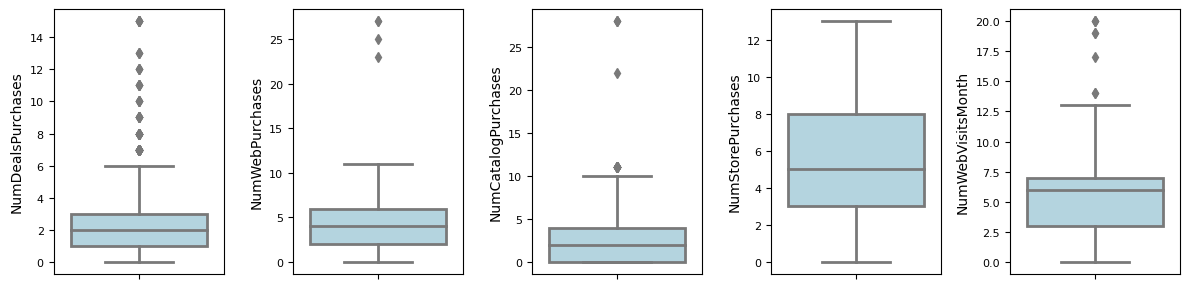

In [308]:
for i in range(0, len(purchase)):
    plt.subplot(1, len(purchase), i+1)
    sns.boxplot(y=df[purchase[i]], color='lightblue', orient='v')
    plt.tight_layout()

Dari boxplot diatas dapat ditunjukkan bahwa customer sering berbelanja apabila ada diskon dimana persebaran data NumDealsPurchases atau pembelian langsung berada pada range 1-3 dengan banyak outlier diatas 6 kali pembelian.

Selain itu customer untuk store ini juga sering berbelanja langusng dimana NumStorePurchases memiliki persebaran dengan left skewed dengan nilai rage antara 3 - 8 dengan tidak ada outlier.

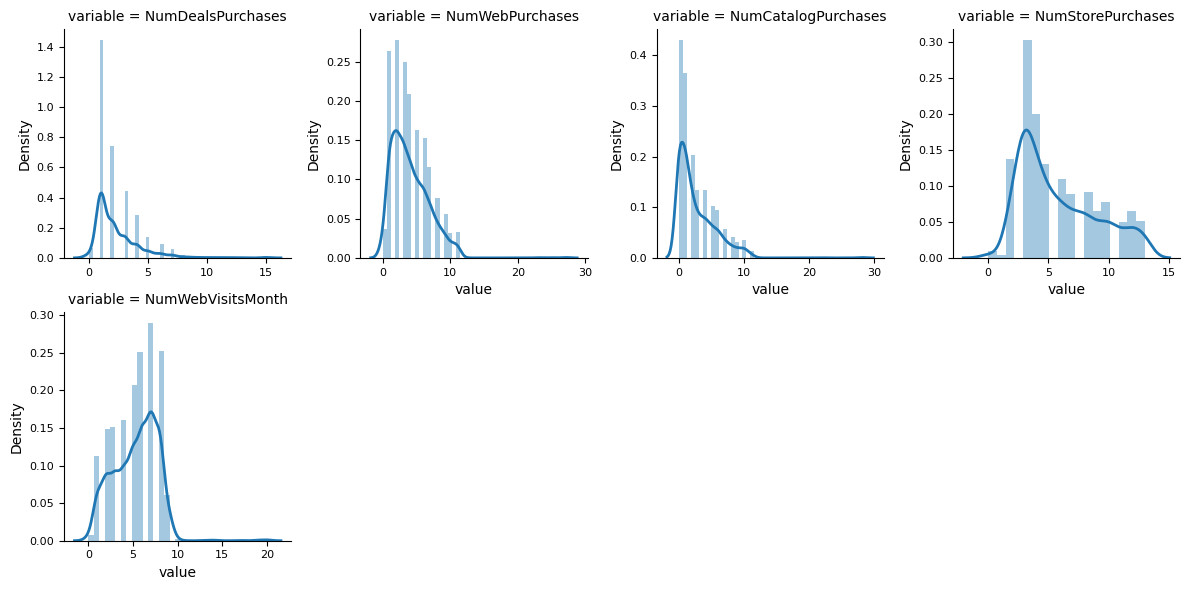

In [309]:
#Analisis NumPurchases atau pembelian setiap customer yang telah berbelanja.
df2 = pd.DataFrame(data=df, columns=purchase)
nd = pd.melt(df2, value_vars =df2 )
n2 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n2 = n2.map(sns.distplot, 'value')
n2
plt.show()

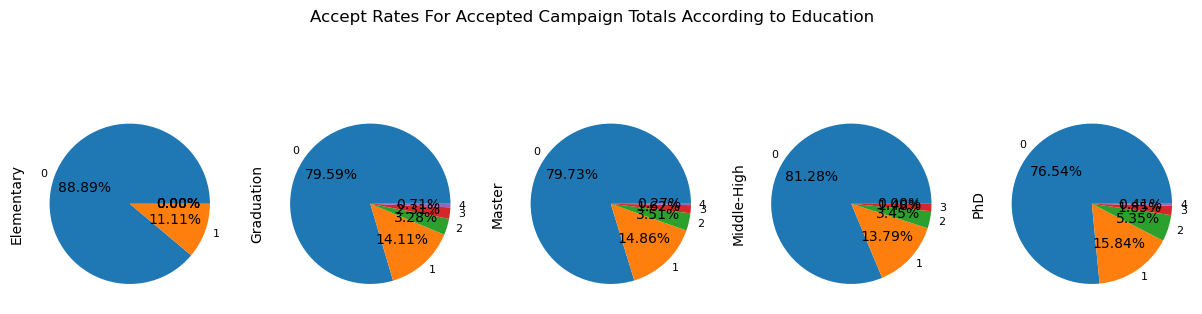

In [310]:
campaigns = ["AcceptedCmptot"]
for i in campaigns:
  pd.crosstab(index= df[i], columns=df['Education']).plot(kind="pie", figsize=(15, 4),
                                                          subplots=True, autopct='%1.2f%%',
                                                          legend=False,
                                                          title=f"Accept Rates For Accepted Campaign Totals According to Education")
  plt.show()

Dari pie chart diatas, dapat ditunjukkan bahwa semakin tinggi tingkat pendidikan, kemungkinan untuk customer accept campaign juga semakin besar.

## Multivariate Analysis

### Hubungan variabel dengan target

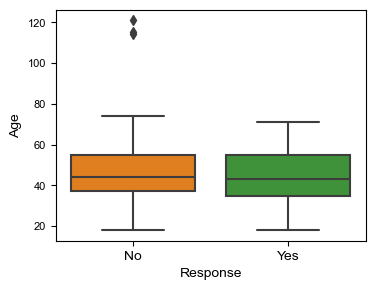

In [311]:
fig, axes = plt.subplots(figsize=(4,3))
sns.set_theme(style="whitegrid")
sns.boxplot(y='Age', x='Response', data=df, palette = "Paired_r")
plt.xticks([0, 1], ['No', 'Yes'], fontsize=10)
plt.show()

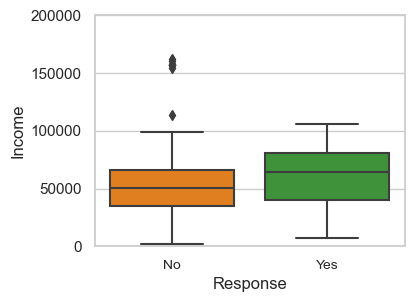

In [312]:
fig, axes = plt.subplots(figsize=(4,3))
sns.set_theme(style="whitegrid")
sns.boxplot(y='Income', x='Response', data=df, palette = "Paired_r")
#plt.xticks(['No', 'Yes'], fontdict= {'fontsize': 10} )
plt.xticks([0, 1], ['No', 'Yes'], fontsize=10)
plt.ylim(0, 200000)
plt.show()

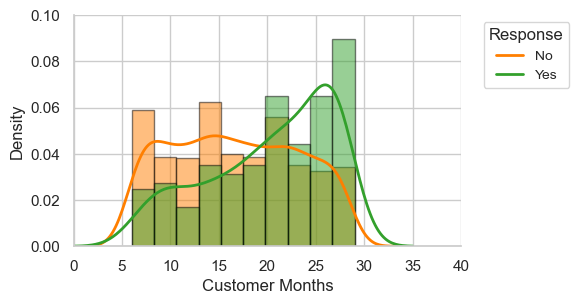

In [313]:
green_join = df[(df['Response']==0)]
green_join = green_join['Customer_Months']

orange_join = df[(df['Response']==1)]
orange_join = orange_join['Customer_Months']

fig, ax = plt.subplots(figsize=(5,3))
sns.set(style="whitegrid")
sns.distplot(green_join, hist=True, kde=True, hist_kws={'edgecolor':'black', 'alpha':0.5}, kde_kws={'linewidth':2}, bins=10, color='#ff7f00')
sns.distplot(orange_join, hist=True, kde=True, hist_kws={'edgecolor':'black', 'alpha':0.5}, kde_kws={'linewidth':2}, bins=10, color='#33a02c')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlabel('Customer Months')
plt.ylim(0, 0.1)
plt.xlim(0,40)
plt.legend(labels = ["No", "Yes"], fontsize = 10, title = "Response", bbox_to_anchor=(1.04, 1), loc="upper left")
plt.show()

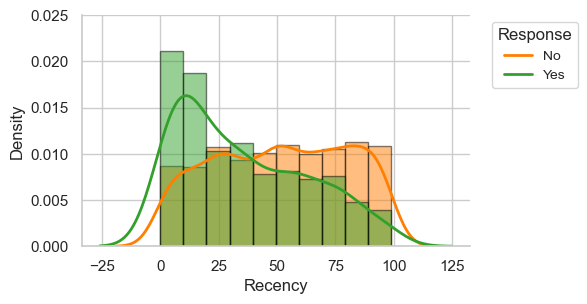

In [314]:
green_recency = df[(df['Response']==0)]
green_recency = green_recency['Recency']

orange_recency = df[(df['Response']==1)]
orange_recency = orange_recency['Recency']

fig, ax = plt.subplots(figsize=(5,3))
sns.set(style="whitegrid")
sns.distplot(green_recency, hist=True, kde=True, hist_kws={'edgecolor':'black', 'alpha':0.5}, kde_kws={'linewidth':2}, bins=10, color='#ff7f00')
sns.distplot(orange_recency, hist=True, kde=True, hist_kws={'edgecolor':'black', 'alpha':0.5}, kde_kws={'linewidth':2}, bins=10, color='#33a02c')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlabel('Recency')
plt.ylim(0, 0.025)
#plt.xlim(0,40)
plt.legend(labels = ["No", "Yes"], fontsize = 10, title = "Response", bbox_to_anchor=(1.04, 1), loc="upper left")
plt.show()

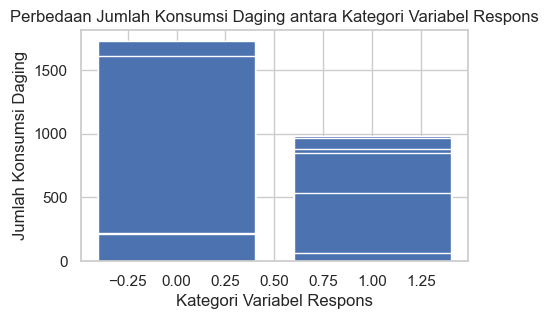

In [315]:
fig, ax = plt.subplots(figsize=(5,3))
plt.bar(df['Response'], df['MntMeatProducts'])
plt.xlabel('Kategori Variabel Respons')
plt.ylabel('Jumlah Konsumsi Daging')
plt.title('Perbedaan Jumlah Konsumsi Daging antara Kategori Variabel Respons')
plt.show()

In [316]:
fig, ax = plt.subplots(figsize=(5,3))
plt.bar(df['Response'], df['MntWines'])
plt.xlabel('Kategori Variabel Respons')
plt.ylabel('Jumlah Konsumsi Wine')
plt.title('Perbedaan Jumlah Konsumsi Wine antara Kategori Variabel Respons')
plt.show()

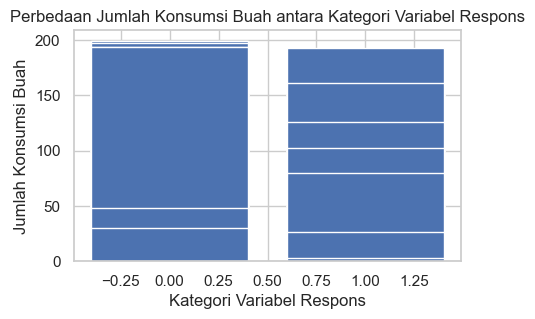

In [317]:
fig, ax = plt.subplots(figsize=(5,3))
plt.bar(df['Response'], df['MntFruits'])
plt.xlabel('Kategori Variabel Respons')
plt.ylabel('Jumlah Konsumsi Buah')
plt.title('Perbedaan Jumlah Konsumsi Buah antara Kategori Variabel Respons')
plt.show()

In [318]:
byEducation = df.groupby('Education').Response.value_counts(normalize=True)
byMarital = df.groupby('Marital_Status').Response.value_counts(normalize=True)
fig, axes = plt.subplots(1, 2, figsize=(10,3))
g1 = byEducation.unstack().plot(ax = axes[0] ,kind ='bar', legend=None)
g2 = byMarital.unstack().plot(ax = axes[1] ,kind ='bar')
for ax in [g1,g2]:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=0, fontsize=7)

plt.legend(labels = ["no", "yes"], fontsize = 10, title = "Response", bbox_to_anchor=(1.04, 1), loc="upper left")
plt.show()

In [319]:
bykidhome = df.groupby('Kidhome').Response.value_counts(normalize=True)
byteenhome = df.groupby('Teenhome').Response.value_counts(normalize=True)
fig, axes = plt.subplots(1, 2, figsize=(10,3))
g1 = bykidhome.unstack().plot(ax = axes[0] ,kind ='bar', legend=None)
g2 = byteenhome.unstack().plot(ax = axes[1] ,kind ='bar')
for ax in [g1,g2]:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=0, fontsize=9)

plt.legend(labels = ["0", "1"], fontsize = 10, title = "Response", bbox_to_anchor=(1.04, 1), loc="upper left")
plt.show()

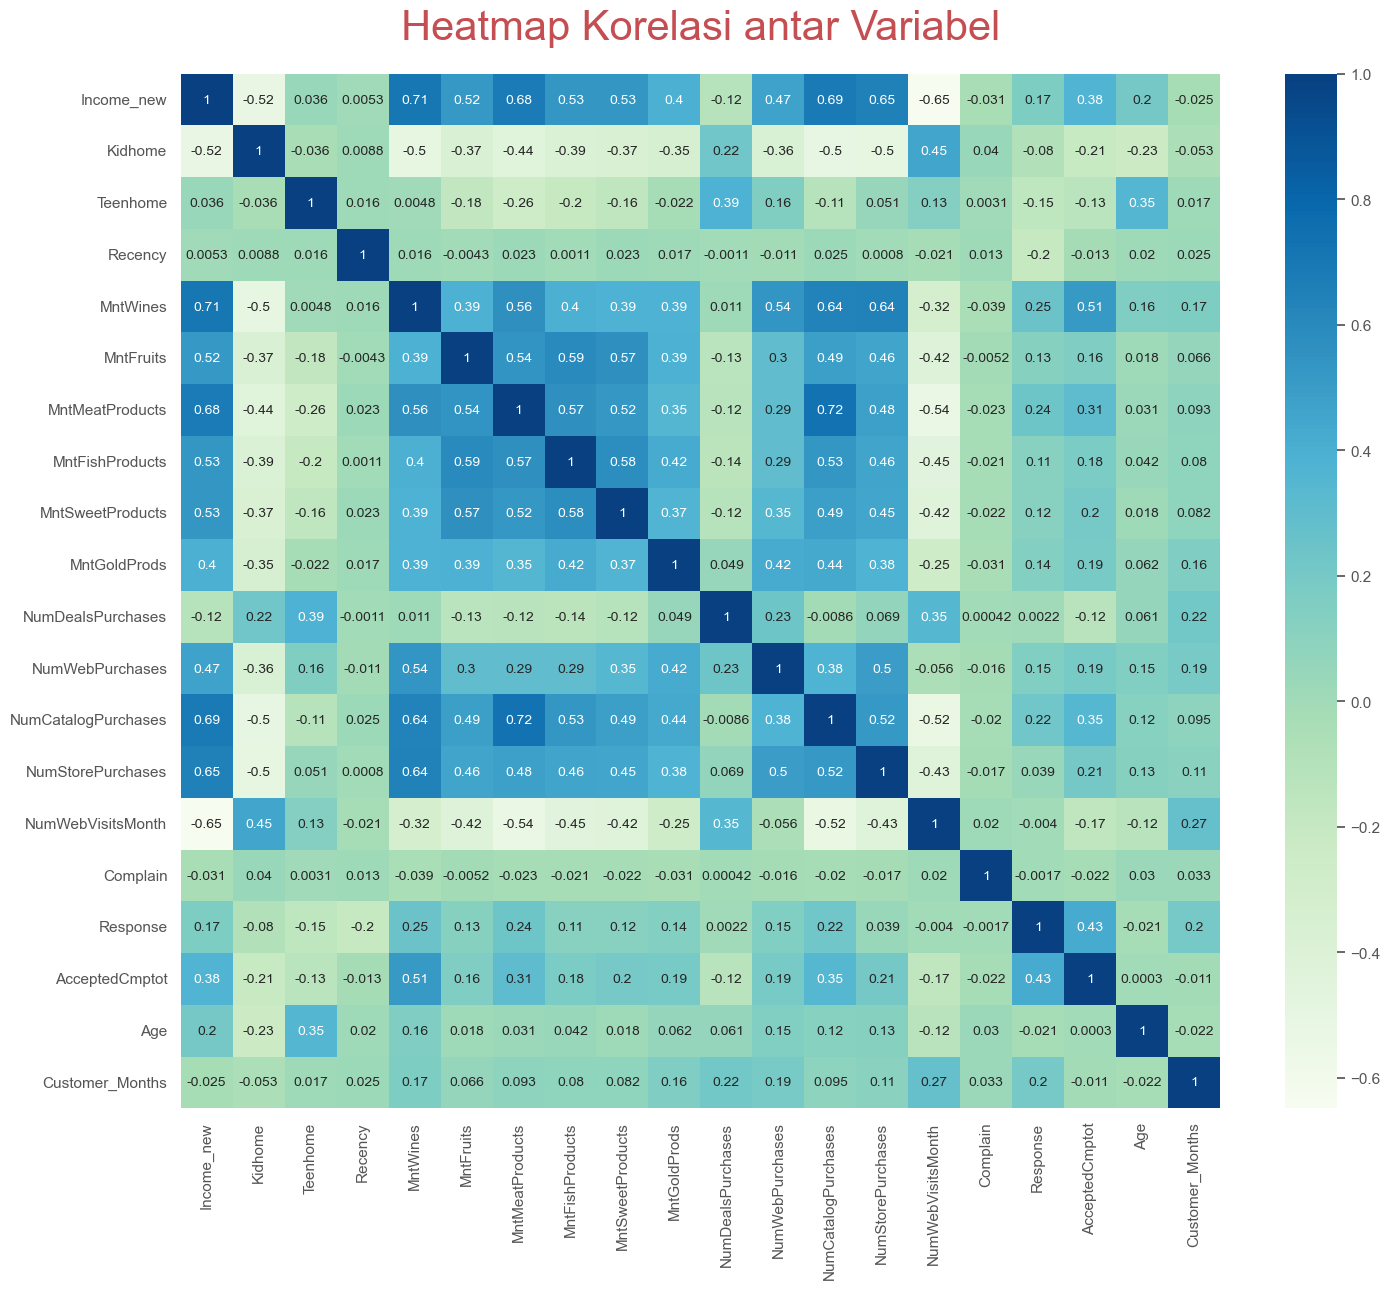

In [320]:
#heatmap korelasi masing-masing variabelnya
plt.figure(figsize=(15,13))
#sns.set_theme('notebook', style='white')
plt.style.use('ggplot')
sns.heatmap(df[['Income_new', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
                   'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
                   'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
                   'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'Response', 'AcceptedCmptot',
                   'Age', 'Customer_Months']].corr(), annot=True, cmap ='GnBu')
plt.title('Heatmap Korelasi antar Variabel', fontsize = 30, pad = 25, color = 'r')
plt.tight_layout()
plt.show()

*   Korelasi antara jumlah anak kecil dalam rumah tangga cukup besar, namun berbanding terbalik dengan jumlah pendapatan. Maka, **semakin tinggi pendapatan, semakin kecil sedikit juga jumlah anak kecil yang dimiliki**.
*   Variabel lain yang memiliki korelasi yang cukup tinggi dengan pendapatan ialah jumlah konsumsi semua produk, serta jumlah pembelian melalui web, catalog, dan toko.
*   Dapat diketahui pula jika variabel umur memiliki korelasi positif dengan pendapatan, namun tidak signifikan. Sehingga dapat disimpulkan, bahwa** semakin tinggi pendapatan kustomer 'umumnya' semakin tua juga umurnya.**
*   Pembelian melalui toko dengan katalog memiliki korelasi yang cukup besar dan berbanding lurus dengan pembelian produk. Berbeda dengan pembelian melalui website yang berbanding terbalik, sehingga **umumnya kustomer membeli produk melalui toko dan katalog.**
*   Jumlah pembelian wine dengan jumlah iklan yang diterima (accepted campaign) cukup besar dan berbanding lurus, dari hal tersebut dapat diketahui bahwa **umumnya kustomer membeli wine karena tergiur oleh iklan.** hmm... 🤔









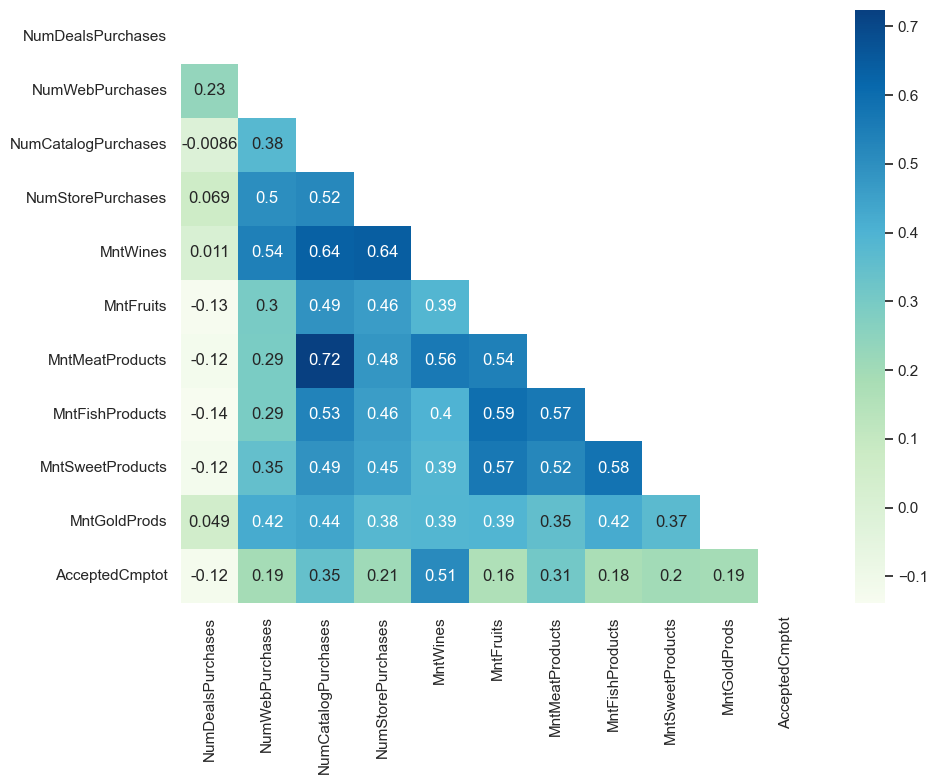

In [321]:
sns.set_theme(style="white")
# Compute the correlation matrix
corr = df[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases','NumStorePurchases',
           'MntWines','MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds','AcceptedCmptot']].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 8))

# Generate a custom diverging colormap
#cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='GnBu',  annot=True)
plt.tight_layout()
plt.show()

In [322]:
sns.set_theme(style="white")
# Compute the correlation matrix
corr = df[['Age', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'Customer_Months', 'AcceptedCmptot']].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 6))

# Generate a custom diverging colormap
#cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='GnBu',  annot=True)
plt.tight_layout()
plt.show()

In [323]:
bycomplain = df.groupby('Complain').Response.value_counts(normalize=True)
bycampaign = df.groupby('AcceptedCmptot').Response.value_counts(normalize=True)
fig, axes = plt.subplots(1, 2, figsize=(10,3))
plt.style.use('default')
g1 = bycomplain.unstack().plot(ax = axes[0] ,kind ='bar', legend=None)
g2 = bycampaign.unstack().plot(ax = axes[1] ,kind ='bar')
for ax in [g1,g2]:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=0, fontsize=9)

plt.legend(labels = ["0", "1"], fontsize = 10, title = "Response", bbox_to_anchor=(1.04, 1), loc="upper left")
plt.show()

In [324]:
fig = plt.figure(figsize=(14, 4))
plt.style.use('default')
for i in range(0, len(spent)):
    ax = fig.add_subplot(2, 3, i+1)
    sns.kdeplot(ax=ax, data=df, x=spent[i], hue='Response', fill=True, common_norm=False, alpha=.5, linewidth=0)
    #plt.xticks(fontsize=10)
    plt.tight_layout()

In [325]:
fig = plt.figure(figsize=(14, 4))
plt.style.use('default')
for i in range(0, len(purchase)):
    ax = fig.add_subplot(2, 3, i+1)
    sns.kdeplot(ax=ax, data=df, x=purchase[i], hue='Response', fill=True, common_norm=False, alpha=.5, linewidth=0)
    #plt.xticks(fontsize=10)
    plt.tight_layout()

### Hubungan antar variabel

In [326]:
fig = plt.figure(figsize=(14, 10))
plt.style.use('default')
for i in range(0, len(demographic)): # untuk setiap kolom numerik
    ax = fig.add_subplot(3, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='Education', y=demographic[i], hue='Response') # gambar catplot/stripplotnya
    plt.xticks(rotation=15, fontsize=8)
    plt.tight_layout()

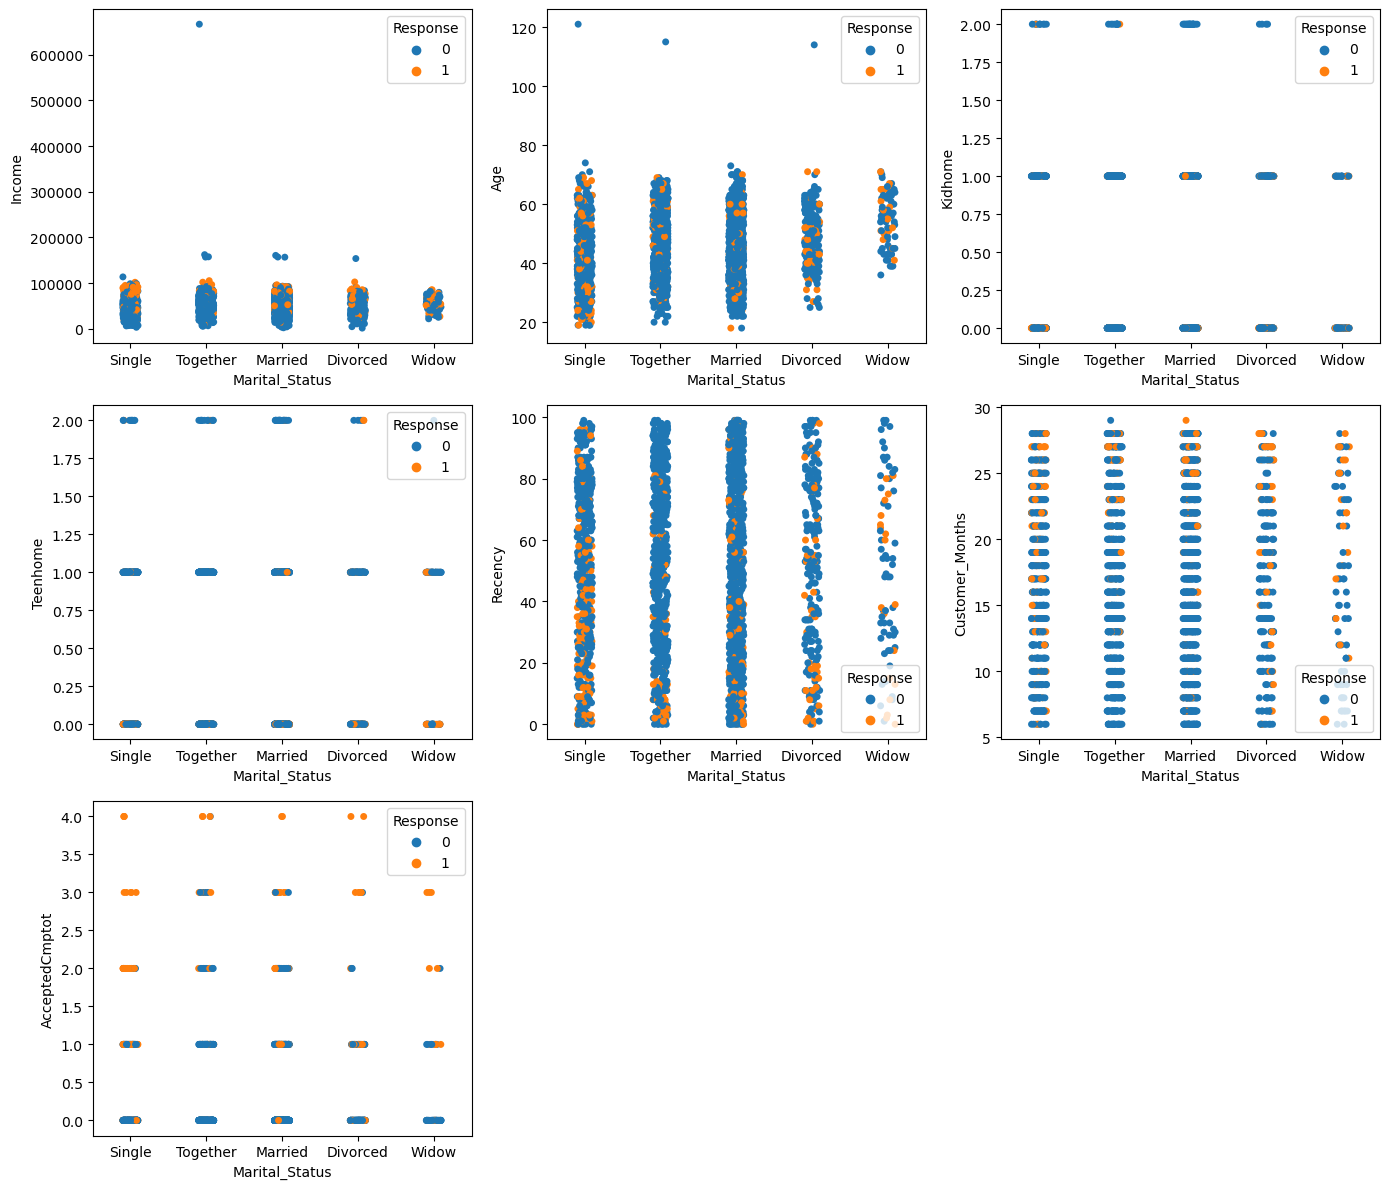

In [327]:
fig = plt.figure(figsize=(14, 12))
plt.style.use('default')
for i in range(0, len(demographic)): # untuk setiap kolom numerik
    ax = fig.add_subplot(3, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='Marital_Status', y=demographic[i], hue='Response') # gambar catplot/stripplotnya
    plt.xticks(fontsize=10)
    plt.tight_layout()

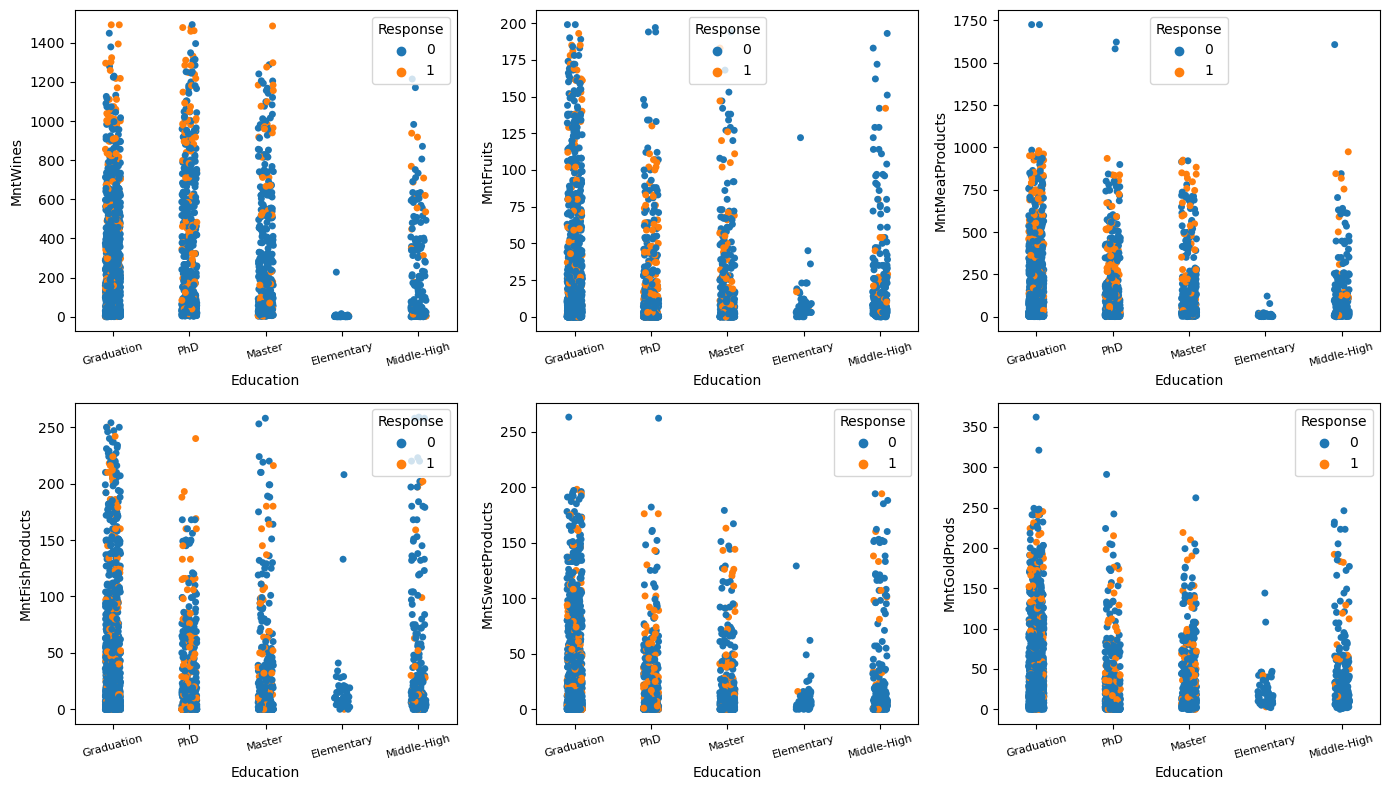

In [328]:
fig = plt.figure(figsize=(14, 8))
plt.style.use('default')
for i in range(0, len(spent)): # untuk setiap kolom numerik
    ax = fig.add_subplot(2, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='Education', y=spent[i], hue='Response') # gambar catplot/stripplotnya
    plt.xticks(rotation=15, fontsize=8)
    plt.tight_layout()

In [329]:
fig = plt.figure(figsize=(14, 8))
plt.style.use('default')
for i in range(0, len(spent)): # untuk setiap kolom numerik
    ax = fig.add_subplot(2, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='Marital_Status', y=spent[i], hue='Response') # gambar catplot/stripplotnya
    plt.tight_layout()

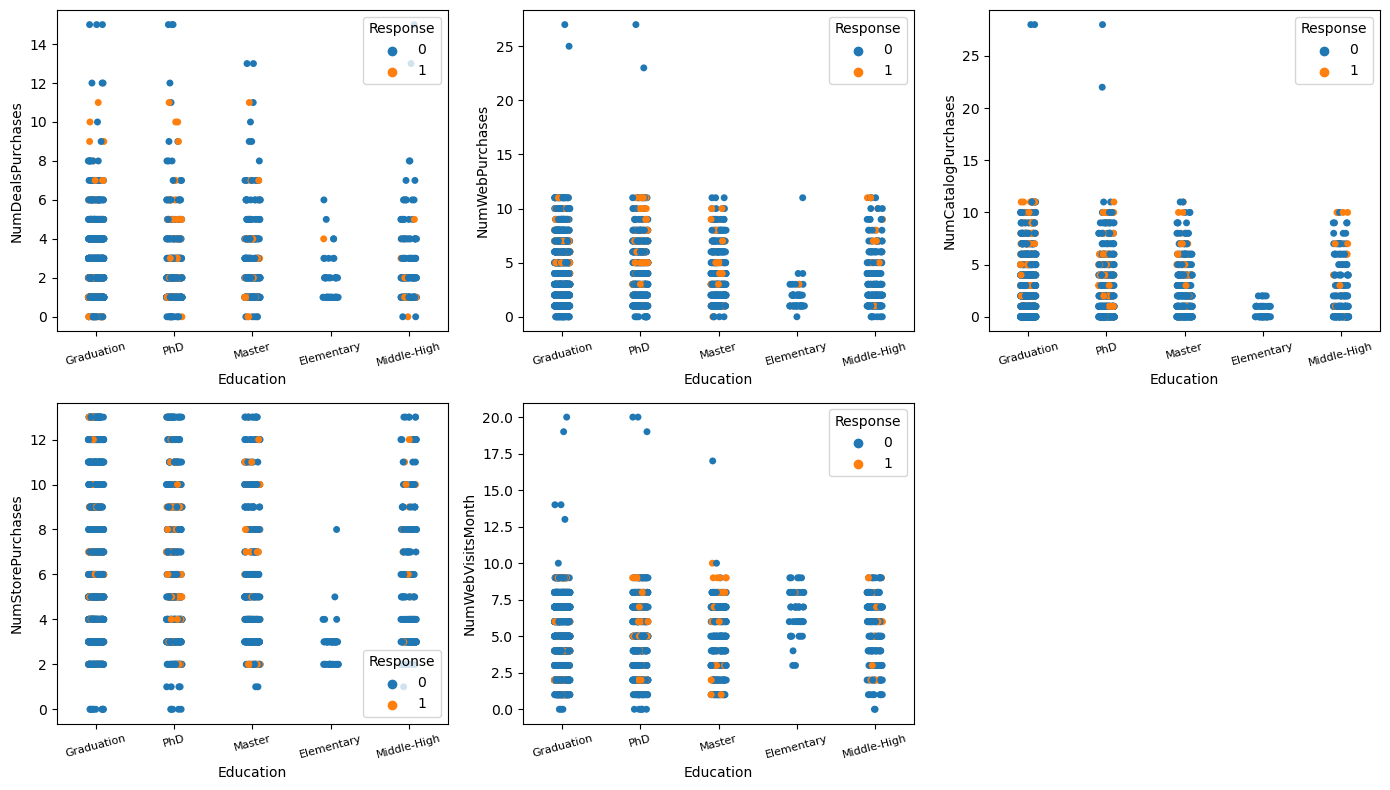

In [330]:
fig = plt.figure(figsize=(14, 8))
plt.style.use('default')
for i in range(0, len(purchase)): # untuk setiap kolom numerik
    ax = fig.add_subplot(2, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='Education', y=purchase[i], hue='Response') # gambar catplot/stripplotnya
    plt.xticks(rotation=15, fontsize=8)
    plt.tight_layout()

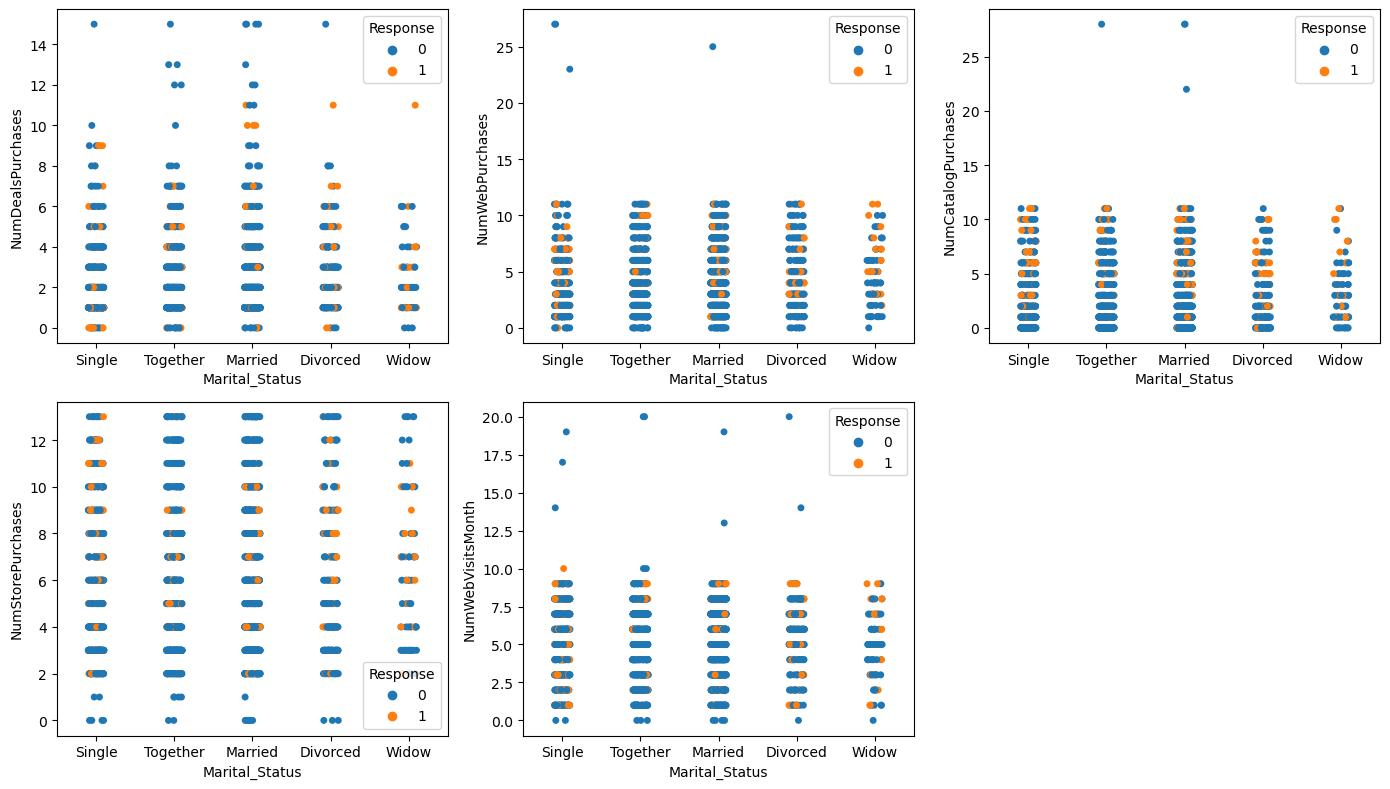

In [331]:
fig = plt.figure(figsize=(14, 8))
plt.style.use('default')
for i in range(0, len(purchase)): # untuk setiap kolom numerik
    ax = fig.add_subplot(2, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='Marital_Status', y=purchase[i], hue='Response') # gambar catplot/stripplotnya
    plt.tight_layout()

## Business Insight

In [332]:
# bisnis insight : segmentasi target
# Pie Chart berdasarkan setiap kategori yang ditinjau dengan value masing-masing berdasarkan income customer
# Will be better if we can just make "Single, Divorced and Widowed as alone" and "Married and Together as In_Couple"
# Maybe we can segmentate age as Elder, Adult or Millenial
import plotly.express as px
fig = px.sunburst(df, path=['Response','Marital_Status', 'Education'], values='Income_new')
fig.show()

In [333]:
kid_spent_1 = df.groupby(['Kidhome']).agg({'MntWines':'median',
                                              'MntFruits':'median',
                                             'MntMeatProducts':'median',
                                             'MntFishProducts':'median',
                                             'MntSweetProducts':'median',
                                             'MntGoldProds':'median'}).reset_index()
#kid_spent_1 = kid_spent[(kid_spent['Response']==1)]
#kid_spent_1 = kid_spent_1.drop(columns=['Response']).copy()
kid_spent_1 = kid_spent_1.set_index(['Kidhome'])

trans_kid_spent_1 = pd.DataFrame(kid_spent_1.T)
trans_kid_spent_1 = pd.DataFrame(trans_kid_spent_1.reset_index())
trans_kid_spent_1 = trans_kid_spent_1.replace({'MntWines':'Wines',
                                              'MntFruits':'Fruits',
                                             'MntMeatProducts':'Meat',
                                             'MntFishProducts':'Fish',
                                             'MntSweetProducts':'Sweet',
                                             'MntGoldProds':'Gold'})
trans_kid_spent_1= trans_kid_spent_1.sort_values(0,ascending=False)

teen_spent_1 = df.groupby(['Teenhome']).agg({'MntWines':'median',
                                              'MntFruits':'median',
                                             'MntMeatProducts':'median',
                                             'MntFishProducts':'median',
                                             'MntSweetProducts':'median',
                                             'MntGoldProds':'median'}).reset_index()
#teen_spent_1 = teen_spent[(teen_spent['Response']==1)]
#teen_spent_1 = teen_spent_1.drop(columns=['Response']).copy()
teen_spent_1 = teen_spent_1.set_index(['Teenhome'])

trans_teen_spent_1 = pd.DataFrame(teen_spent_1.T)
trans_teen_spent_1 = pd.DataFrame(trans_teen_spent_1.reset_index())
trans_teen_spent_1 = trans_teen_spent_1.replace({'MntWines':'Wines',
                                              'MntFruits':'Fruits',
                                             'MntMeatProducts':'Meat',
                                             'MntFishProducts':'Fish',
                                             'MntSweetProducts':'Sweet',
                                             'MntGoldProds':'Gold'})
trans_teen_spent_1= trans_teen_spent_1.sort_values(0,ascending=False)

sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(13,4), sharey = True)

g1 = trans_kid_spent_1.plot(ax=axes[0], x='index', kind='bar', stacked=False, width = 0.8)
g2 = trans_teen_spent_1.plot(ax=axes[1], x='index', kind='bar', stacked=False, width = 0.8)
axes[0].legend(title='Number of Kid')
axes[1].legend(title='Number of Teen')
for ax in [g1,g2]:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=0)
    ax.set_xlabel('Product Type')
    ax.set_ylabel('Amount Spent (in $)')

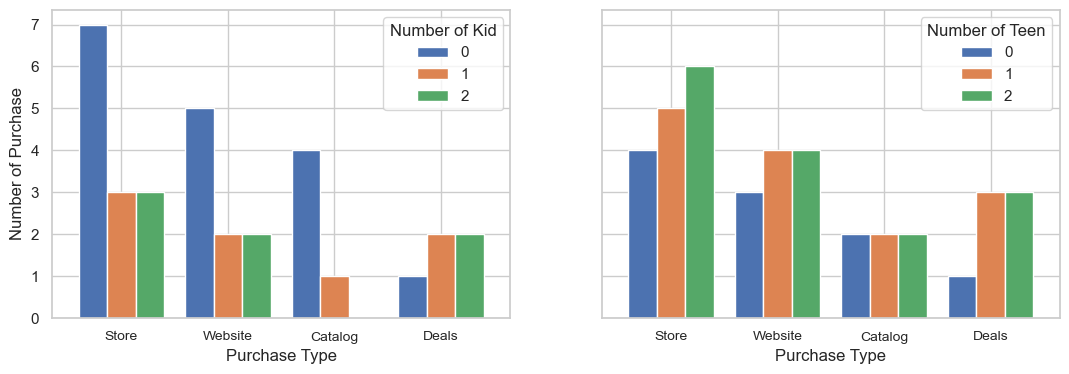

In [334]:
kid_purchase_1 = df.groupby(['Kidhome']).agg({'NumDealsPurchases':'median',
                                              'NumWebPurchases':'median',
                                             'NumCatalogPurchases':'median',
                                             'NumStorePurchases':'median'}).reset_index()
#kid_purchase_1 = kid_purchase[(kid_purchase['Response']==1)]
#kid_purchase_1 = kid_purchase_1.drop(columns=['Response']).copy()
kid_purchase_1 = kid_purchase_1.set_index(['Kidhome'])

trans_kid_purchase_1 = pd.DataFrame(kid_purchase_1.T)
trans_kid_purchase_1 = pd.DataFrame(trans_kid_purchase_1.reset_index())
trans_kid_purchase_1 = trans_kid_purchase_1.replace({'NumDealsPurchases' :'Deals',
                                                     'NumWebPurchases' : 'Website',
                                                     'NumCatalogPurchases' : 'Catalog',
                                                     'NumStorePurchases' : 'Store'})
trans_kid_purchase_1= trans_kid_purchase_1.sort_values(0,ascending=False)

teen_purchase_1 = df.groupby(['Teenhome']).agg({'NumDealsPurchases':'median',
                                              'NumWebPurchases':'median',
                                             'NumCatalogPurchases':'median',
                                             'NumStorePurchases':'median'}).reset_index()

#teen_purchase_1 = teen_purchase[(teen_purchase['Response']==1)]
#teen_purchase_1 = teen_purchase_1.drop(columns=['Response']).copy()
teen_purchase_1 = teen_purchase_1.set_index(['Teenhome'])

trans_teen_purchase_1 = pd.DataFrame(teen_purchase_1.T)
trans_teen_purchase_1 = pd.DataFrame(trans_teen_purchase_1.reset_index())
trans_teen_purchase_1 = trans_teen_purchase_1.replace({'NumDealsPurchases' :'Deals',
                                                     'NumWebPurchases' : 'Website',
                                                     'NumCatalogPurchases' : 'Catalog',
                                                     'NumStorePurchases' : 'Store'})
trans_teen_purchase_1= trans_teen_purchase_1.sort_values(0,ascending=False)

sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(13,4), sharey = True)

g1 = trans_kid_purchase_1.plot(ax=axes[0], x='index', kind='bar', stacked=False, width = 0.8)
g2 = trans_teen_purchase_1.plot(ax=axes[1], x='index', kind='bar', stacked=False, width = 0.8)
axes[0].legend(title='Number of Kid', loc = 'upper right')
axes[1].legend(title='Number of Teen')
for ax in [g1,g2]:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=0, fontsize=10)
    ax.set_xlabel('Purchase Type')
    ax.set_ylabel('Number of Purchase')

#plt.legend(fontsize = 10, title = "Response", bbox_to_anchor=(1.04, 1), loc="upper left")

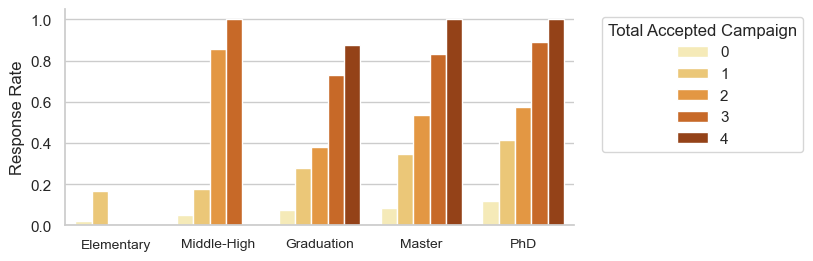

In [335]:
plt.style.use('default')
sns.set_theme(style="whitegrid")
#c = sns.palplot(sns.color_palette("BrBG", 7))
g = sns.catplot(data=df, x="Education", y="Response", hue="AcceptedCmptot",kind="bar", height=3, aspect=2, ci=None,
                order=['Elementary','Middle-High','Graduation', 'Master', 'PhD'], palette="YlOrBr", legend=None)
g.set_axis_labels("","Response Rate")
g.set_xticklabels(fontdict= {'fontsize': 10}, rotation = 0 )
#g.set_titles("{col_name} {col_var}")
#g.set(ylim=(0, 1))
plt.legend(title = "Total Accepted Campaign", bbox_to_anchor=(1.04, 1), loc="upper left")
plt.show()

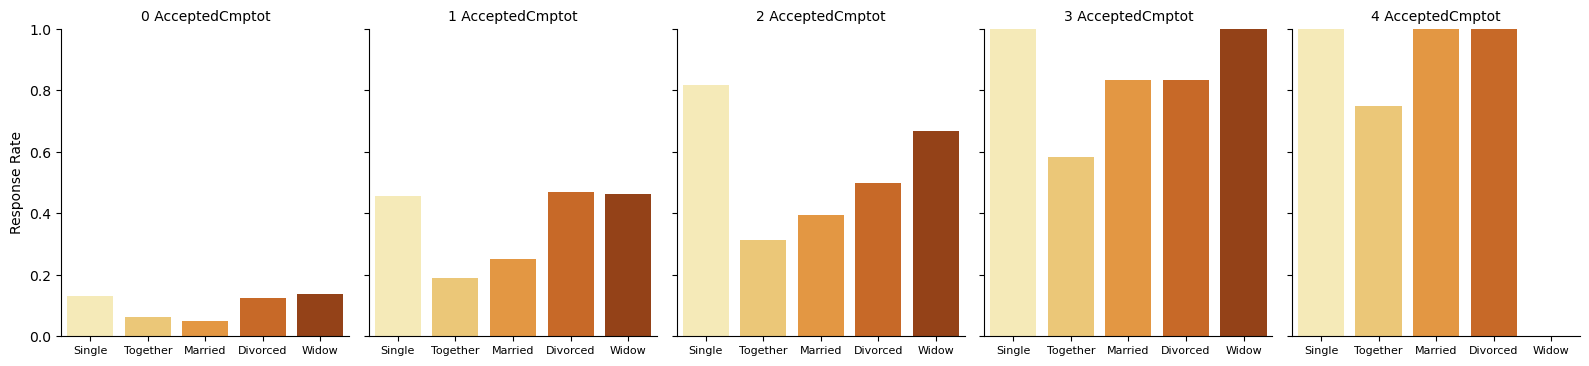

In [336]:
plt.style.use('default')
g = sns.catplot(data=df, x="Marital_Status", y="Response", col="AcceptedCmptot",kind="bar", height=4, aspect=.8, ci=None, palette="YlOrBr")
g.set_axis_labels("","Response Rate")
g.set_xticklabels(fontdict= {'fontsize': 8}, rotation = 0 )
g.set_titles("{col_name} {col_var}")
g.set(ylim=(0, 1))
plt.show()

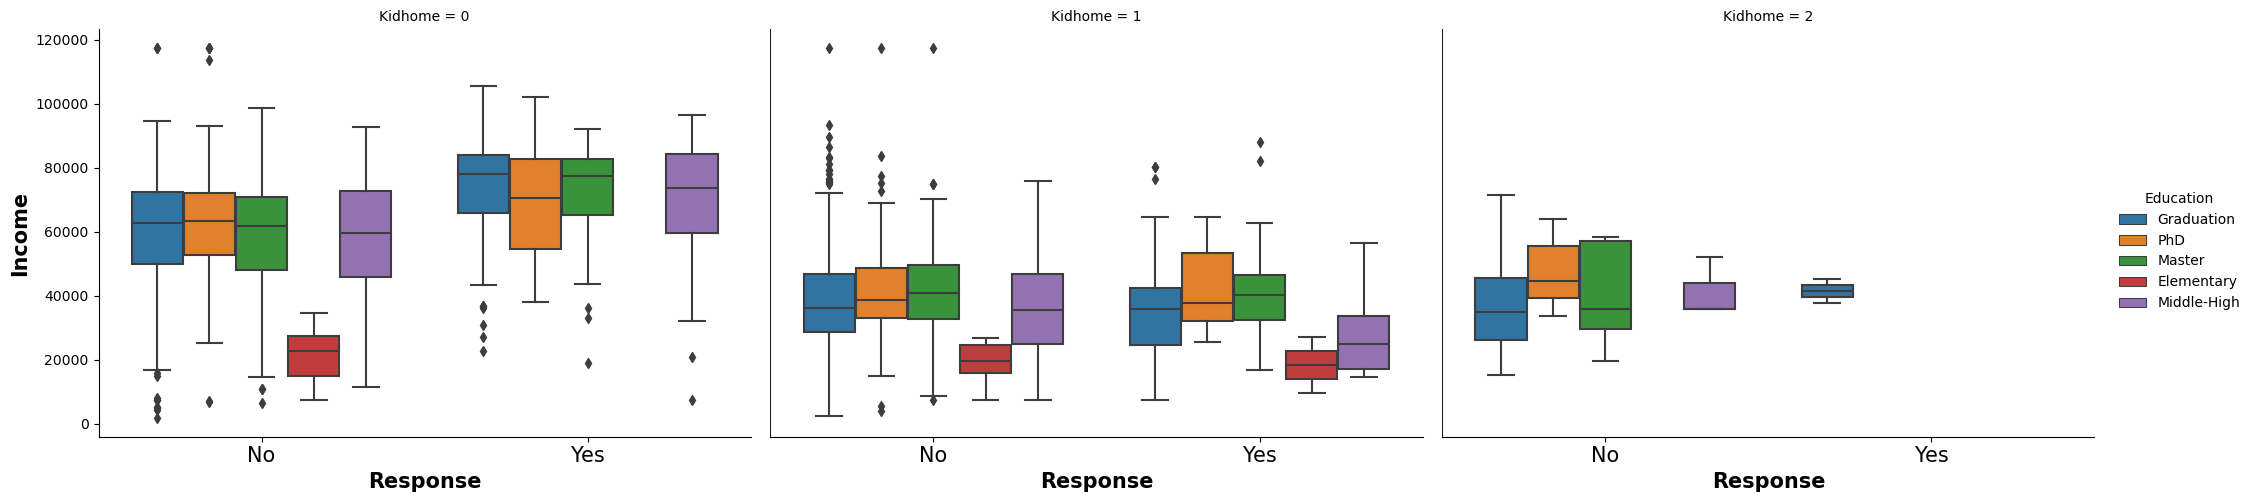

In [337]:
plt.style.use('default')
g = sns.catplot(kind='box', data=df, x='Response', y='Income_new', col='Kidhome', hue='Education', height=5, aspect=11.7/8.27)
#g.fig.subplots_adjust(wspace=0.1)
g.set_xticklabels(['No', 'Yes'], fontdict= {'fontsize': 15} )
g.set_xlabels(fontsize = 15, fontweight ='bold')
g.set_ylabels('Income', fontsize = 15, fontweight ='bold')

for ax in g.axes.flatten()[1:]:
    ax.spines['left'].set_visible(False)
    [tick.set_visible(False) for tick in ax.yaxis.get_major_ticks()]
    xmin,xmax = ax.get_xlim()
    ax.axvline(xmin, ls='-', color='k')

In [338]:
plt.style.use('default')
g = sns.catplot(kind='box', data=df, x='Response', y='Income_new', col='Teenhome', hue='Education', height=5, aspect=11.7/8.27)
#g.fig.subplots_adjust(wspace=0.1)
g.set_xticklabels(['No', 'Yes'], fontdict= {'fontsize': 15} )
g.set_xlabels(fontsize = 15, fontweight ='bold')
g.set_ylabels('Income', fontsize = 15, fontweight ='bold')

for ax in g.axes.flatten()[1:]:
    ax.spines['left'].set_visible(False)
    [tick.set_visible(False) for tick in ax.yaxis.get_major_ticks()]
    xmin,xmax = ax.get_xlim()
    ax.axvline(xmin, ls='-', color='k')

In [339]:
spent_edu = df.groupby(['Education']).agg({'MntWines':'median',
                                              'MntFruits':'median',
                                             'MntMeatProducts':'median',
                                             'MntFishProducts':'median',
                                             'MntSweetProducts':'median',
                                             'MntGoldProds':'median'}).reset_index()
spent_edu = spent_edu.sort_values('MntWines' , ascending=False)
sns.set_theme(style="whitegrid")
spent_edu.plot(x='Education', kind='bar', stacked=False, width=0.8)
plt.ylabel('Amount Spent (in $)')
plt.xticks(rotation=0)
plt.legend(title='Product Type',  labels = ["Wine", "Fruit", "Meat", "Fish", "Sweet", "Gold"], fontsize = 10, bbox_to_anchor=(1.04, 1), loc="upper left")
plt.show()

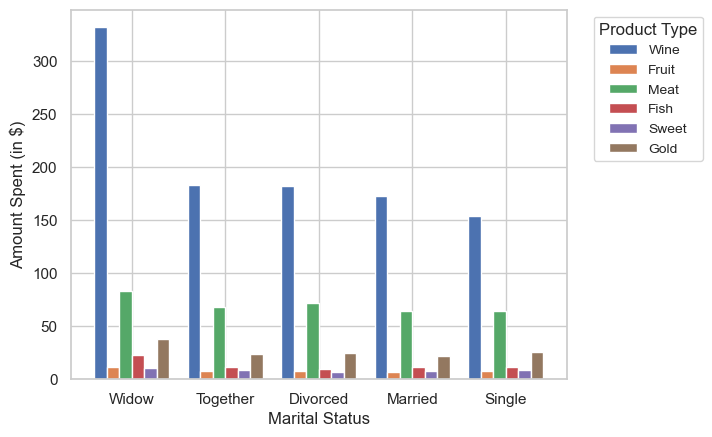

In [340]:
spent_marital = df.groupby(['Marital_Status']).agg({'MntWines':'median',
                                              'MntFruits':'median',
                                             'MntMeatProducts':'median',
                                             'MntFishProducts':'median',
                                             'MntSweetProducts':'median',
                                             'MntGoldProds':'median'}).reset_index()
spent_marital = spent_marital.sort_values('MntWines' , ascending=False)
sns.set_theme(style="whitegrid")
spent_marital.plot(x='Marital_Status', kind='bar', stacked=False, width=0.8)
plt.ylabel('Amount Spent (in $)')
plt.xlabel('Marital Status')
plt.xticks(rotation=0)
plt.legend(title='Product Type',  labels = ["Wine", "Fruit", "Meat", "Fish", "Sweet", "Gold"], fontsize = 10, bbox_to_anchor=(1.04, 1), loc="upper left")
plt.show()

# DATA PREPROCESSING - STAGE 2

## Data Cleaning

*   Handle missing values = dilakukan imputasi missing value pada variabel income dengan median
*   Handle duplicated data = tidak terdapat data yang duplikat
*   Handle outliers = dilakukan penanganan outlier pada income menggunakan iqr
*   Feature transformation = dilakukan standarisasi pada semua variabel numerik
*   Feature encoding pada education dan marital_status
*   Handle class imbalance

## Feature Engineering

* 2A. Feature selection (membuang feature yang kurang relevan atau redundan)
* 2B. Feature extraction (membuat feature baru dari feature yang sudah ada)
* 2C. Tuliskan minimal 4 feature tambahan (selain yang sudah tersedia di dataset) yang mungkin akan sangat membantu membuat performansi model semakin bagus (ini hanya ide saja, untuk menguji kreativitas teman-teman, tidak perlu benar-benar dicari datanya dan tidak perlu diimplementasikan)

Untuk 2A & 2B, tetap tuliskan jika memang tidak bisa dilakukan (contoh: “Semua feature digunakan untuk modelling (tidak ada yang dihapus), karena semua feature relevan”)

In [341]:
# duplicated data
# tidak ada data yang duplikat
df.duplicated(subset=['ID']).sum()

0

In [342]:
# feature extraction - POIN 2B
# dilakukan penggabungan variabel AcceptedCmp1 sampai AcceptedCmp5 menjadi AcceptedCmptot pada stage 1
# membuat fitur baru yaitu jumlah anggota keluarga
df['ParentSize'] = np.where((df['Marital_Status'] == 'Divorced') | (df['Marital_Status'] == 'Single') | (df['Marital_Status'] == 'Widow'), 1,2)
df['HouseholdSize'] = df['Kidhome'] + df['Teenhome'] + df['ParentSize']

In [343]:
# feature extraction
# membuat fitur age menjadi data kategorikal karena terlihat dari hasil eda bahwa tidak ada perbedaan age pada response no dan yes

def age_category(Age):
    if Age >= 18 and Age <= 20:
        kategori = "Teenager"
    elif Age >= 21 and Age <= 60:
        kategori = "Adult"
    else:
        kategori = "Elderly"
    return kategori

df['Age_Category'] = df.apply(lambda x: age_category(x['Age']), axis=1)
pd.set_option('display.max_columns', None)

In [344]:
print(df['Age_Category'].value_counts())

Adult       1961
Elderly      269
Teenager      10
Name: Age_Category, dtype: int64


In [345]:
plt.style.use('default')
g = sns.catplot(data=df, x="Age_Category", y="Response", hue="AcceptedCmptot",kind="bar", height=3, aspect=2, ci=None)
g.set_axis_labels("","Response Rate")
g.set_xticklabels(fontdict= {'fontsize':7,'fontweight': 'bold'} )
g.set_titles("{col_name} {col_var}")
g.set(ylim=(0, 1))
plt.show()

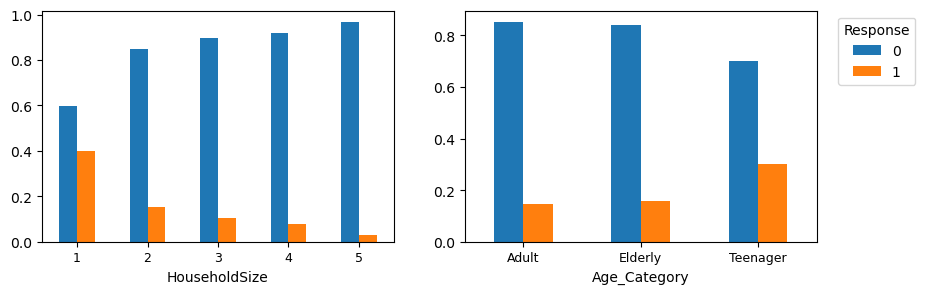

In [346]:
byhhsize = df.groupby('HouseholdSize').Response.value_counts(normalize=True)
byagecat = df.groupby('Age_Category').Response.value_counts(normalize=True)
fig, axes = plt.subplots(1, 2, figsize=(10,3))
g1 = byhhsize.unstack().plot(ax = axes[0] ,kind ='bar', legend=None)
g2 = byagecat.unstack().plot(ax = axes[1] ,kind ='bar')
for ax in [g1,g2]:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=0, fontsize=9)

plt.legend(labels = ["0", "1"], fontsize = 10, title = "Response", bbox_to_anchor=(1.04, 1), loc="upper left")
plt.show()

In [347]:
# feature selection - remove variabel yang tidak digunakan
df_new = df.drop(columns=['ID','Year_Birth', 'Dt_Customer', 'Z_CostContact',
                          'Z_Revenue', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3',
                          'AcceptedCmp4', 'AcceptedCmp5', 'ParentSize', 'Income_new']).copy()
df_new.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'Response',
       'AcceptedCmptot', 'Age', 'Customer_Months', 'HouseholdSize',
       'Age_Category'],
      dtype='object')

### split data

In [348]:
X = df_new.drop(columns=['Response',], axis=1)
y = df_new[['Response']]

X.sample(5)

Education Marital_Status   Income  Kidhome  Teenhome  Recency  \
1256  Middle-High        Married  62972.0        0         1       39   
37    Middle-High        Married  23718.0        1         0       76   
256           PhD       Together  63342.0        0         1       48   
1567   Graduation       Together  75315.0        0         1       14   
874        Master       Together  61346.0        1         0       34   

      MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
1256       313         15               47               20                 0   
37           6          3               14               15                 7   
256        918         21              118               13                10   
1567       459         15              171              142                23   
874        562         58              168               43                16   

      MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
1256           192                  2                7                    4   
37              36                  3                3                    1   
256             21                  3                8                    3   
1567            31                  2                5                    4   
874            142                  1                5                    7   

      NumStorePurchases  NumWebVisitsMonth  Complain  AcceptedCmptot  Age  \
1256                  3                  6         0               0   59   
37                    2                  7         0               0   38   
256                   5                  6         0               1   53   
1567                 12                  2         0               0   60   
874                  10                  3         0               0   36   

      Customer_Months  HouseholdSize Age_Category  
1256               28              3        Adult  
37                 15              3        Adult  
256                26              3        Adult  
1567                8              3        Adult  
874                14              3        Adult

In [349]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [350]:
print(X_train.shape)
print(y_train.shape)
print('')
print(X_test.shape)
print(y_test.shape)

(1568, 23)
(1568, 1)

(672, 23)
(672, 1)


In [351]:
low, high = outlier(X_train['Income'])

#replacing outlier with upper bound and lower bound value
X_train['Income'] = np.where(X_train['Income']>high, high, X_train['Income'])
X_train['Income'] = np.where(X_train['Income']<low, low, X_train['Income'])
X_test['Income'] = np.where(X_test['Income']>high, high, X_test['Income'])
X_test['Income'] = np.where(X_test['Income']<low, low, X_test['Income'])

In [352]:
# feature encoding pada education dan marital status
# label encoder pada Education
X_train['Education'] = X_train['Education'].astype('category').cat.codes
X_train['Age_Category'] = X_train['Age_Category'].astype('category').cat.codes
X_test['Education'] = X_test['Education'].astype('category').cat.codes
X_test['Age_Category'] = X_test['Age_Category'].astype('category').cat.codes

# one hot encoding pada marital status karena tidak memiliki urutan
status_x_train = pd.get_dummies(X_train['Marital_Status'], prefix='Status')
X_train = X_train.join(status_x_train)
status_x_test = pd.get_dummies(X_test['Marital_Status'], prefix='Status')
X_test = X_test.join(status_x_test)

In [353]:
print(X_train.columns)
print(y_train.columns)
print('')
print(X_test.columns)
print(y_test.columns)

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'AcceptedCmptot',
       'Age', 'Customer_Months', 'HouseholdSize', 'Age_Category',
       'Status_Divorced', 'Status_Married', 'Status_Single', 'Status_Together',
       'Status_Widow'],
      dtype='object')
Index(['Response'], dtype='object')

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'AcceptedCmptot',
       'Age', 'Customer_Months', 'HouseholdSize', 'Age_Category',
       'Status_Di

In [354]:
X_train.sample(5)

Education Marital_Status   Income  Kidhome  Teenhome  Recency  MntWines  \
1182          4       Divorced  54959.0        0         1       55      1148   
850           1         Single  49166.0        0         1       17       224   
2061          4         Single  51381.5        1         0       82        23   
1633          1       Together  22775.0        1         0       40         5   
1829          2       Together  22669.0        1         0       30        16   

      MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
1182          0               60                0                 0   
850           2               25                7                 0   
2061          0               15                0                 2   
1633          1                8                0                 0   
1829         14               36               37                22   

      MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
1182            24                  3                9                    5   
850            110                  2                5                    3   
2061             7                  2                3                    0   
1633             1                  1                1                    0   
1829            48                  3                4                    1   

      NumStorePurchases  NumWebVisitsMonth  Complain  AcceptedCmptot  Age  \
1182                  4                  7         0               1   53   
850                   3                  6         0               0   40   
2061                  3                  6         0               0   33   
1633                  2                  8         0               0   36   
1829                  2                  9         0               0   39   

      Customer_Months  HouseholdSize  Age_Category  Status_Divorced  \
1182               23              2             0                1   
850                18              2             0                0   
2061               19              2             0                0   
1633               18              3             0                0   
1829               19              3             0                0   

      Status_Married  Status_Single  Status_Together  Status_Widow  
1182               0              0                0             0  
850                0              1                0             0  
2061               0              1                0             0  
1633               0              0                1             0  
1829               0              0                1             0

In [355]:
X_test.sample(5)

Education Marital_Status   Income  Kidhome  Teenhome  Recency  MntWines  \
1321          2       Together  46692.0        0         1       37       170   
588           1       Together  53863.0        0         1        4       399   
123           1       Divorced  30992.0        1         0       83        17   
478           4        Married  62010.0        0         1       93       371   
1004          4        Married  36930.0        0         1       50       223   

      MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
1321          6               97               24                12   
588           4               30                6                 4   
123           0               14                7                 3   
478          22               39                6                 0   
1004          2               31                0                 2   

      MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
1321            88                  3                6                    1   
588             30                  3                7                    1   
123              2                  1                1                    0   
478             92                  4                6                    2   
1004            39                  5                5                    2   

      NumStorePurchases  NumWebVisitsMonth  Complain  AcceptedCmptot  Age  \
1321                  5                  6         0               0   56   
588                   7                  7         0               1   59   
123                   3                  7         0               0   38   
478                   7                  5         0               0   42   
1004                  4                  8         0               0   60   

      Customer_Months  HouseholdSize  Age_Category  Status_Divorced  \
1321               18              3             0                0   
588                 7              3             0                0   
123                20              2             0                1   
478                26              3             0                0   
1004               19              3             0                0   

      Status_Married  Status_Single  Status_Together  Status_Widow  
1321               0              0                1             0  
588                0              0                1             0  
123                0              0                0             0  
478                1              0                0             0  
1004               1              0                0             0

In [356]:
X_train = X_train.drop(columns=['Marital_Status', 'Age']).copy()
X_test = X_test.drop(columns=['Marital_Status', 'Age']).copy()

In [357]:
demographic2 = ['Income', 'Kidhome', 'Teenhome', 'Recency', 'Customer_Months', 'AcceptedCmptot', 'HouseholdSize' ]

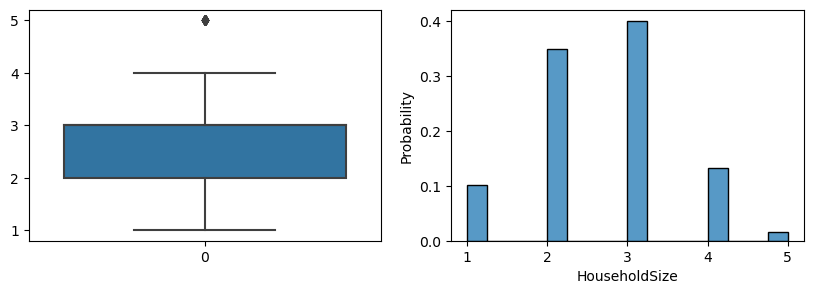

In [358]:
fig, axes = plt.subplots(1, 2, figsize=(10,3))
sns.boxplot(ax=axes[0], data = X_train['HouseholdSize'])
sns.histplot(ax=axes[1], data = X_train, x = "HouseholdSize", stat = "probability", bins=int(80/5))
plt.show()

In [359]:
nums = ['Income', 'Kidhome', 'Teenhome', 'Recency', 'Customer_Months', 'AcceptedCmptot', 'HouseholdSize',
        'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases','NumStorePurchases', 'NumWebVisitsMonth']

In [360]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

for n in nums:
  scaler = ss.fit(X_train[[n]])
  X_train[n] = scaler.transform(X_train[[n]])
  X_test[n] = scaler.transform(X_test[[n]])

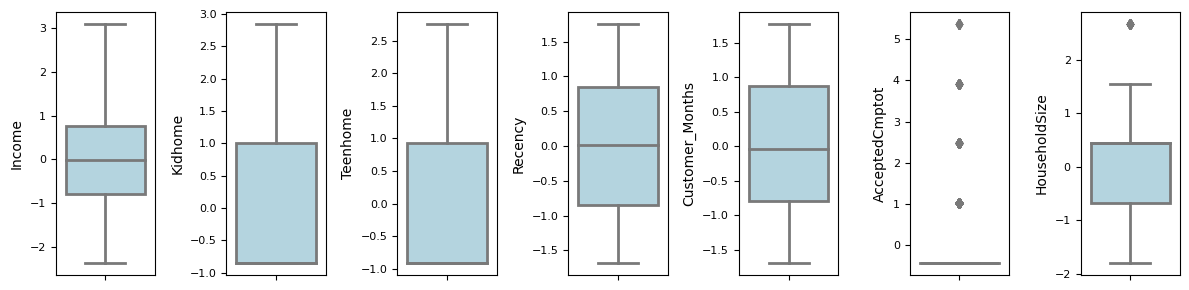

In [361]:
# visualisasi setelah scaling data
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 3
rcParams['lines.linewidth'] = 2
rcParams['xtick.labelsize'] = 8
rcParams['ytick.labelsize'] = 8

for i in range(0, len(demographic2)):
    plt.subplot(1, len(demographic2), i+1)
    sns.boxplot(y=X_train[demographic2[i]], color='lightblue', orient='v')
    plt.tight_layout()

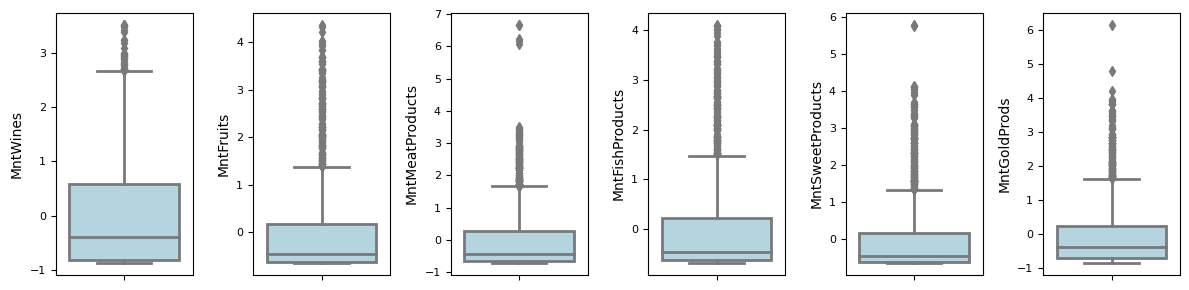

In [362]:
for i in range(0, len(spent)):
    plt.subplot(1, len(spent), i+1)
    sns.boxplot(y=X_train[spent[i]], color='lightblue', orient='v')
    plt.tight_layout()

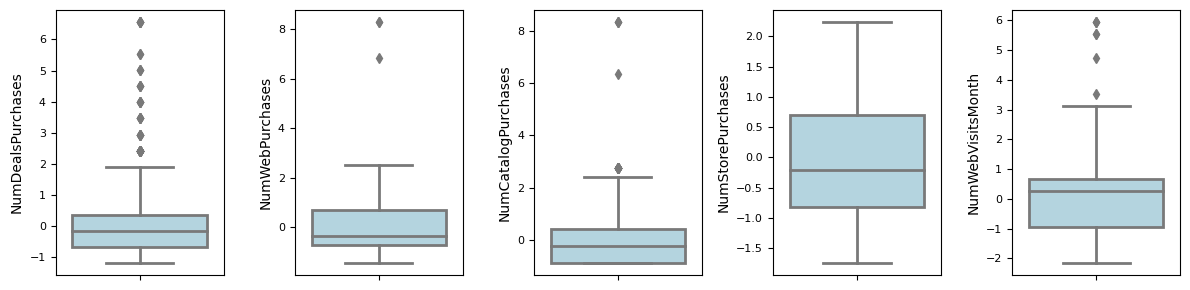

In [363]:
for i in range(0, len(purchase)):
    plt.subplot(1, len(purchase), i+1)
    sns.boxplot(y=X_train[purchase[i]], color='lightblue', orient='v')
    plt.tight_layout()

### smote - handle class imbalance

In [364]:
# resampling dengan smote
from imblearn import over_sampling
X_train_smote, y_train_smote = over_sampling.SMOTE(random_state=42).fit_resample(X_train, y_train)

# hasil resampling dengan smote
print(y_train_smote.value_counts())

Response
0           1329
1           1329
dtype: int64


**Mencari variabel yang datanya imbalance**

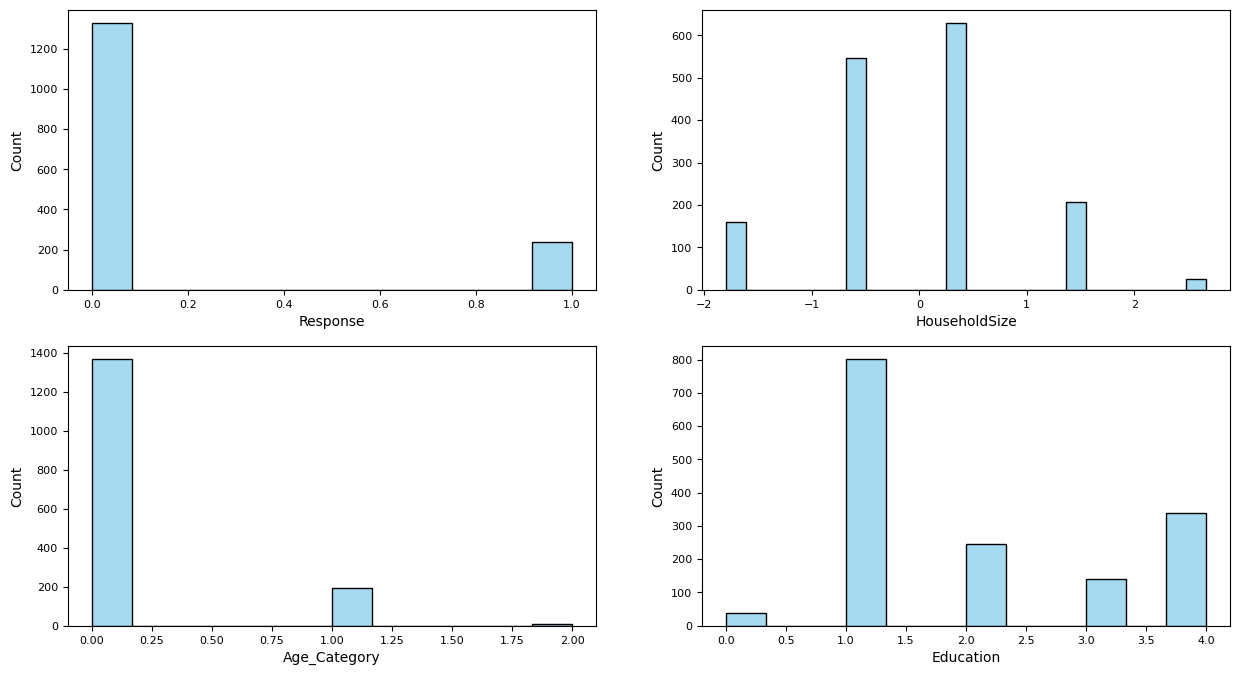

In [365]:
#mencari data imbalance
fig,axes = plt.subplots(2,2,figsize=(15,8))

sns.histplot(data=y_train,x='Response',ax=axes[0,0],color='skyblue')
sns.histplot(data=X_train,x='HouseholdSize',ax=axes[0,1],color='skyblue')
sns.histplot(data=X_train,x='Age_Category',ax=axes[1,0],color='skyblue')
sns.histplot(data=X_train,x='Education',ax=axes[1,1],color='skyblue')

plt.show()

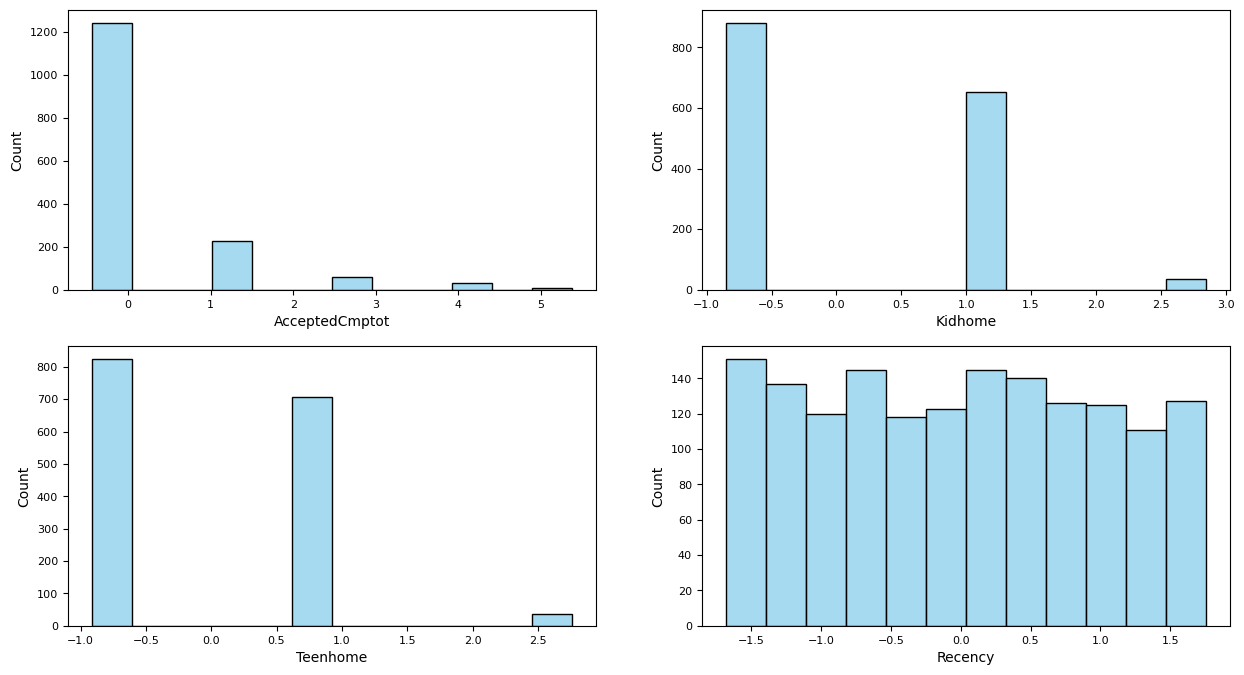

In [366]:
#mencari data imbalance
fig,axes = plt.subplots(2,2,figsize=(15,8))

sns.histplot(data=X_train,x='AcceptedCmptot',ax=axes[0,0],color='skyblue')
sns.histplot(data=X_train,x='Kidhome',ax=axes[0,1],color='skyblue')
sns.histplot(data=X_train,x='Teenhome',ax=axes[1,0],color='skyblue')
sns.histplot(data=X_train,x='Recency',ax=axes[1,1],color='skyblue')

plt.show()

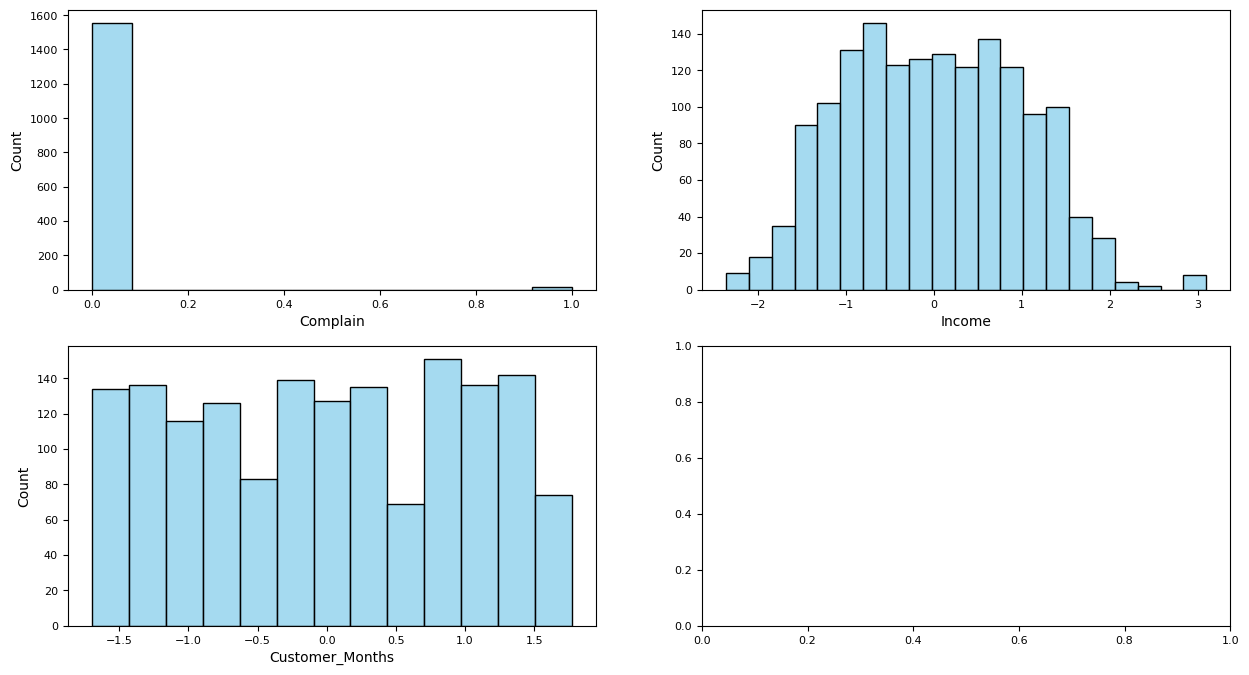

In [367]:
#mencari data imbalance
fig,axes = plt.subplots(2,2,figsize=(15,8))

sns.histplot(data=X_train,x='Complain',ax=axes[0,0],color='skyblue')
sns.histplot(data=X_train,x='Income',ax=axes[0,1],color='skyblue')
sns.histplot(data=X_train,x='Customer_Months',ax=axes[1,0],color='skyblue')
#sns.histplot(data=df,x='Income',ax=axes[1,1],color='skyblue')

plt.show()

In [368]:
# pembuatan binary label target
df['response_class'] = df['Response'] > 0.8
df['response_class'].value_counts()

False    1906
True      334
Name: response_class, dtype: int64

In [369]:
# Menghitung jumlah kemunculan setiap nilai dalam variabel
value_counts = df['Response'].value_counts()

# Mengambil jumlah "yes" dan "no"
yes_count = value_counts.get('0', 1906)
no_count = value_counts.get('1', 334)

# Menghitung persentase "yes" dan "no"
total_count = len(df)
yes_percentage = (yes_count / total_count) * 100
no_percentage = (no_count / total_count) * 100

# Menampilkan hasil
print("Persentase Yes:", yes_percentage)
print("Persentase No:", no_percentage)

Persentase Yes: 85.08928571428571
Persentase No: 14.910714285714285


In [370]:
# pemisahan features vs target
#X = df[[col for col in df.columns if (str(df[col].dtype) != 'object') and col not in ['Response', 'response_class']]]
#y = df['response_class'].values
#print(X.shape)
#print(y.shape)

**Memproses variabel yang datanya imbalance**

In [371]:
# split ini udah aku pindah ke atas
from imblearn.over_sampling import RandomOverSampler

# Mengambil variabel 'Complain', 'Response', dan variabel lainnya dari DataFrame df
# X = df.drop(['Response'], axis=1)
# y_response = df['Response']

In [372]:
print(X_train.shape)
print('')
print(y_train.value_counts())

(1568, 26)

Response
0           1329
1            239
dtype: int64


In [373]:
# Menerapkan oversampling pada variabel 'Response' menggunakan RandomOverSampler
from imblearn.over_sampling import RandomOverSampler

# Mengambil variabel 'Complain', 'Response', dan variabel lainnya dari DataFrame df

ros_response = RandomOverSampler(random_state=42)
X_train_over, y_train_over = ros_response.fit_resample(X_train, y_train)

# Menggabungkan kembali data yang telah diresampling menjadi DataFrame baru
df_over = pd.concat([X_train_over, y_train_over], axis=1)

print(df_over.shape)
print('jumlah response:')
print(df_over['Response'].value_counts())

(2658, 27)
jumlah response:
0    1329
1    1329
Name: Response, dtype: int64


In [374]:
df_over.columns

Index(['Education', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Complain', 'AcceptedCmptot', 'Customer_Months', 'HouseholdSize',
       'Age_Category', 'Status_Divorced', 'Status_Married', 'Status_Single',
       'Status_Together', 'Status_Widow', 'Response'],
      dtype='object')

In [375]:
# sebelum dilakukan handle class imbalance
fig, axes = plt.subplots(figsize=(8, 5))
sns.histplot(data=y_train, x='Response', color='skyblue')
plt.title('Sebelum Handle Data Imbalance', fontsize = 12) # Menambahkan jarak antar subplot
plt.show()

In [376]:
#sebelum dilakukan handle class imbalance
fig, axes = plt.subplots(figsize=(8, 5))
sns.histplot(data=df_over, x='Response', color='skyblue')
plt.title('Setelah Handle Data Imbalance', fontsize = 12) # Menambahkan jarak antar subplot
plt.show()

**FEATURE EXTRACTION - POIN 2B**
- membuat fitur baru yaitu customer_month yang diperoleh dari DtCustomer
- menambahkan fitur baru yaitu household size
- membuat fitur age menjadi data kategorikal

**FITUR TAMBAHAN - POIN 2C**
- WebEngagement:  Menghitung tingkat interaksi pelanggan dengan situs web perusahaan Fitur ini mencerminkan seberapa sering pelanggan mengunjungi situs web dan seberapa baru kunjungan terakhir mereka.
- Jumlah cicilan
- Tempat tinggal customer: untuk mengetahui apakah customer cocok dengan campaign yang akan dibuat, apakah campaign dalam bentuk web purchase atau store purchase
- Delivery time from web purchase: lama pengiriman dapat mempengaruhi customer untuk merespon campaign

# MODELING - STAGE 3

## DATA TANPA SMOTE

In [377]:
X_train = X_train.drop(['Kidhome', 'Teenhome'], axis=1)
X_test = X_test.drop(['Kidhome', 'Teenhome'], axis=1)

In [378]:
X_train.columns

Index(['Education', 'Income', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Complain', 'AcceptedCmptot', 'Customer_Months', 'HouseholdSize',
       'Age_Category', 'Status_Divorced', 'Status_Married', 'Status_Single',
       'Status_Together', 'Status_Widow'],
      dtype='object')

In [379]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate

def eval_classification(model):
    #y_pred_test = model.predict(X_test)
    #y_pred_train = model.predict(X_train)
    #y_pred_proba_test = model.predict_proba(X_test)
    #y_pred_proba_train = model.predict_proba(X_train)
    
    y_pred_proba_train = model.predict_proba(X_train)
    y_predict_prob_class_1_train = y_pred_proba_train[:,1]
    y_pred_train = [1 if prob > 0.5 else 0 for prob in y_predict_prob_class_1_train]

    y_pred_proba_test = model.predict_proba(X_test)
    y_predict_prob_class_1_test = y_pred_proba_test[:,1]
    y_pred_test = [1 if prob > 0.5 else 0 for prob in y_predict_prob_class_1_test]

    print("Accuracy (Train Set): %.2f" % accuracy_score(y_train, y_pred_train))
    print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train))
    print("Recall (Train Set): %.2f" % recall_score(y_train, y_pred_train))
    print("F1-Score (Train Set): %.2f" % f1_score(y_train, y_pred_train))

    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred_test))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred_test))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred_test))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred_test))

    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba_test[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))

    score = cross_validate(model, X_train, y_train, cv=5, scoring='recall', return_train_score=True)
    print('roc_auc (crossval train): '+ str(score['train_score'].mean()))
    print('roc_auc (crossval test): '+ str(score['test_score'].mean()))

In [380]:
def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

In [381]:
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

### Logistic Regression

In [1555]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate

def eval_classification2(model):
    #y_pred_test = model.predict(X_test)
    #y_pred_train = model.predict(X_train)
    #y_pred_proba_test = model.predict_proba(X_test)
    #y_pred_proba_train = model.predict_proba(X_train)
    
    y_pred_proba_train = model.predict_proba(X_train)
    y_predict_prob_class_1_train = y_pred_proba_train[:,1]
    y_pred_train = [1 if prob > 0.3 else 0 for prob in y_predict_prob_class_1_train]

    y_pred_proba_test = model.predict_proba(X_test)
    y_predict_prob_class_1_test = y_pred_proba_test[:,1]
    y_pred_test = [1 if prob > 0.3 else 0 for prob in y_predict_prob_class_1_test]

    #print("Accuracy:", round(accuracy_score(y_train, y_predict_class_train), 3))

    print("Accuracy (Train Set): %.2f" % accuracy_score(y_train, y_pred_train))
    print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train))
    print("Recall (Train Set): %.2f" % recall_score(y_train, y_pred_train))
    print("F1-Score (Train Set): %.2f" % f1_score(y_train, y_pred_train))

    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred_test))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred_test))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred_test))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred_test))

    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba_test[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))

    score = cross_validate(model, X_train, y_train, cv=5, scoring='recall', return_train_score=True)
    print('roc_auc (crossval train): '+ str(score['train_score'].mean()))
    print('roc_auc (crossval test): '+ str(score['test_score'].mean()))

In [1430]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
eval_classification2(lr)

Accuracy (Train Set): 0.89
Precision (Train Set): 0.63
Recall (Train Set): 0.67
F1-Score (Train Set): 0.65
Accuracy (Test Set): 0.87
Precision (Test Set): 0.53
Recall (Test Set): 0.54
F1-Score (Test Set): 0.53
roc_auc (test-proba): 0.86
roc_auc (train-proba): 0.91
roc_auc (crossval train): 0.4874291012216405
roc_auc (crossval test): 0.4605496453900709


In [1431]:
# tuning parameter dengan random search
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
penalty = ['l1', 'l2']
C = [float(x) for x in np.linspace(0.0001, 0.1, 100)]
hyperparameters = dict(penalty=penalty, C=C)

lr = LogisticRegression()
rs_lr = RandomizedSearchCV(lr, hyperparameters, scoring='recall', random_state=42, cv=5, n_iter=50)
rs_lr.fit(X_train, y_train)
eval_classification2(rs_lr)

Accuracy (Train Set): 0.89
Precision (Train Set): 0.64
Recall (Train Set): 0.66
F1-Score (Train Set): 0.65
Accuracy (Test Set): 0.86
Precision (Test Set): 0.51
Recall (Test Set): 0.51
F1-Score (Test Set): 0.51
roc_auc (test-proba): 0.85
roc_auc (train-proba): 0.91
roc_auc (crossval train): 0.42993019197207677
roc_auc (crossval test): 0.43138297872340425


In [1432]:
show_best_hyperparameter(rs_lr) # Check the best hyperparameter after tuning

{'C': 0.08284545454545456, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [1433]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression

def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []

    for c in param_values:
        model = LogisticRegression(penalty='l2', C=c)
        model.fit(X_train, y_train)

        # eval on train
        y_pred_proba_train = model.predict_proba(X_train)
        y_predict_prob_class_1_train = y_pred_proba_train[:,1]
        y_pred_train = [1 if prob > 0.3 else 0 for prob in y_predict_prob_class_1_train]
        train_precision = precision_score(y_train, y_pred_train)
        train_scores.append(train_precision)

        # eval on test
        y_pred_proba_test = model.predict_proba(X_test)
        y_predict_prob_class_1_test = y_pred_proba_test[:,1]
        y_pred_test = [1 if prob > 0.3 else 0 for prob in y_predict_prob_class_1_test]
        test_precision = precision_score(y_test, y_pred_test)
        test_scores.append(test_precision)

        print('param value: ' + str(c) + '; train: ' + str(train_precision) + '; test: '+ str(test_precision))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('C')
    plt.ylabel('Precision')
    plt.title('Learning Curve - Hyperparameter C - Logistic Regression')
    plt.legend()
    plt.show()

# learning curve
import numpy as np
param_values = [float(x) for x in np.linspace(0.0001, 0.1, 100)]
draw_learning_curve(param_values)

param value: 0.0001; train: 0.0; test: 0.0
param value: 0.0011090909090909092; train: 0.8051948051948052; test: 0.7692307692307693
param value: 0.002118181818181818; train: 0.7142857142857143; test: 0.717948717948718
param value: 0.0031272727272727272; train: 0.7054794520547946; test: 0.6545454545454545
param value: 0.004136363636363637; train: 0.6942675159235668; test: 0.6349206349206349
param value: 0.005145454545454546; train: 0.6666666666666666; test: 0.5970149253731343
param value: 0.006154545454545455; train: 0.6467391304347826; test: 0.5882352941176471
param value: 0.007163636363636364; train: 0.640625; test: 0.5915492957746479
param value: 0.008172727272727272; train: 0.6391752577319587; test: 0.5972222222222222
param value: 0.009181818181818182; train: 0.6414141414141414; test: 0.5866666666666667
param value: 0.01019090909090909; train: 0.6435643564356436; test: 0.5714285714285714
param value: 0.0112; train: 0.645320197044335; test: 0.5555555555555556
param value: 0.0122090909

In [1434]:
print(X_train.columns)
rs_lr.best_estimator_.coef_

Index(['Education', 'Income', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Complain', 'AcceptedCmptot', 'Customer_Months', 'HouseholdSize',
       'Age_Category', 'Status_Divorced', 'Status_Married', 'Status_Single',
       'Status_Together', 'Status_Widow'],
      dtype='object')


array([[ 0.26161567, -0.05851425, -0.73609883, -0.1313762 ,  0.13739145,
         0.31260509, -0.03097594,  0.02003763,  0.16823342,  0.1553726 ,
         0.2245572 ,  0.08857051, -0.43993299,  0.26359101, -0.04437844,
         1.07841168,  0.62377089, -0.43940664,  0.04667265,  0.12835074,
        -0.19836316,  0.23579857, -0.31595806,  0.15056772]])

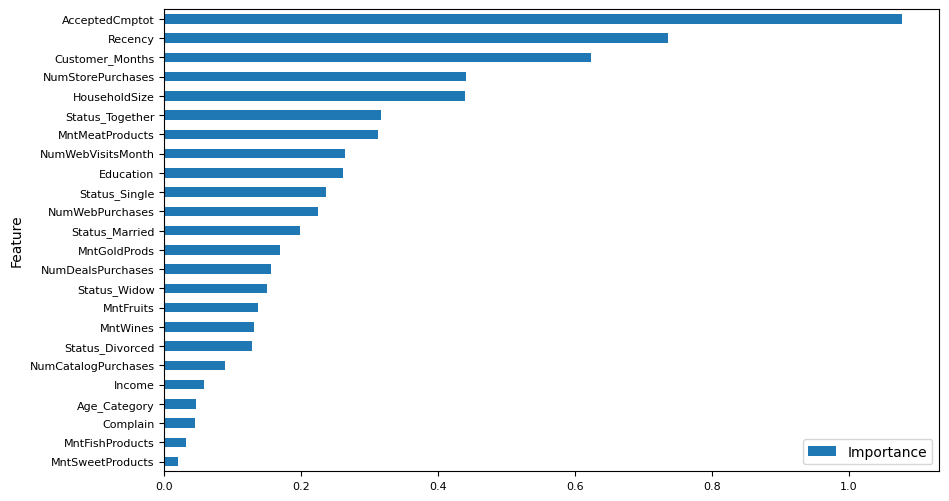

In [1435]:
# feature importance lr pakai best estimator
coefficients = rs_lr.best_estimator_.coef_
avg_importance = np.mean(np.abs(coefficients), axis=0)
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': avg_importance})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))
plt.show()

In [1436]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train, X_train)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.253961
         Iterations 8
                           Results: Logit
Model:                Logit            Pseudo R-squared: 0.405      
Dependent Variable:   Response         AIC:              844.4210   
Date:                 2023-06-29 14:14 BIC:              973.0023   
No. Observations:     1568             Log-Likelihood:   -398.21    
Df Model:             23               LL-Null:          -669.36    
Df Residuals:         1544             LLR p-value:      5.3717e-100
Converged:            1.0000           Scale:            1.0000     
No. Iterations:       8.0000                                        
--------------------------------------------------------------------
                     Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------
Education            0.3097   0.0746   4.1501 0.0000  0.1634  0.4560
Income              -0.0765 

In [1437]:
# confusion matrix pada data test
from sklearn.metrics import confusion_matrix
#rs_lr.fit(X_train, y_train)
y_pred_test = rs_lr.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(5, 5))
#sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,  fmt='.2%', cmap='GnBu')
ax = sns.heatmap(cf_matrix, annot=True,  fmt='.0f', cmap='crest', linewidth=.5)
ax.set(xlabel="predicted label", ylabel="true label")
ax.xaxis.set_label_position('top')
ax.xaxis.tick_top()
plt.show()

### AdaBoost

In [382]:
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier(random_state=99)
ab.fit(X_train, y_train)
eval_classification(ab)

Accuracy (Train Set): 0.92
Precision (Train Set): 0.79
Recall (Train Set): 0.64
F1-Score (Train Set): 0.71
Accuracy (Test Set): 0.89
Precision (Test Set): 0.67
Recall (Test Set): 0.48
F1-Score (Test Set): 0.56
roc_auc (test-proba): 0.86
roc_auc (train-proba): 0.96
roc_auc (crossval train): 0.6328315881326352
roc_auc (crossval test): 0.5192375886524823


In [383]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# List of hyperparameter
hyperparameters = dict(n_estimators = [int(x) for x in np.linspace(start = 50, stop = 2000, num = 1500)], # Jumlah iterasi
                       learning_rate = [float(x) for x in np.linspace(start = 0.01, stop = 2, num = 300)],
                       algorithm = ['SAMME', 'SAMME.R'])

# Init model
ab = AdaBoostClassifier(random_state=42)
rs_ab = RandomizedSearchCV(ab, hyperparameters, random_state=42, cv=5, scoring='recall')
rs_ab.fit(X_train,y_train)

# Predict & Evaluation
eval_classification(rs_ab)

Accuracy (Train Set): 0.96
Precision (Train Set): 0.92
Recall (Train Set): 0.83
F1-Score (Train Set): 0.87
Accuracy (Test Set): 0.90
Precision (Test Set): 0.68
Recall (Test Set): 0.52
F1-Score (Test Set): 0.59
roc_auc (test-proba): 0.86
roc_auc (train-proba): 0.99
roc_auc (crossval train): 0.9528904886561955
roc_auc (crossval test): 0.5234042553191489


In [384]:
show_best_hyperparameter(rs_ab) # Check the best hyperparameter after tuning

{'algorithm': 'SAMME.R', 'base_estimator': 'deprecated', 'estimator': None, 'learning_rate': 1.2612374581939798, 'n_estimators': 284, 'random_state': 42}


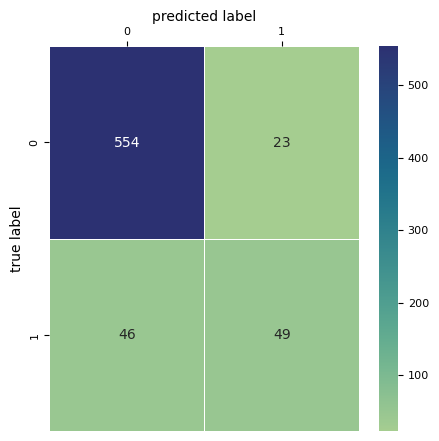

In [385]:
# predict pada data testing
y_pred = rs_ab.predict(X_test)
y_pred_proba = rs_ab.predict_proba(X_test)

# confusion matrix pada data test
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 5))
#sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,  fmt='.2%', cmap='GnBu')
ax = sns.heatmap(cf_matrix, annot=True,  fmt='.0f', cmap='crest', linewidth=.5)
ax.set(xlabel="predicted label", ylabel="true label")
ax.xaxis.set_label_position('top')
ax.xaxis.tick_top()
plt.show()

In [386]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.ensemble import AdaBoostClassifier

def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []

    for c in param_values:
        model = AdaBoostClassifier(learning_rate=c, n_estimators=1435, algorithm='SAMME', random_state=42)
        model.fit(X_train, y_train)

        # eval on train
        y_pred_proba_train = model.predict_proba(X_train)
        y_predict_prob_class_1_train = y_pred_proba_train[:,1]
        y_pred_train = [1 if prob > 0.5 else 0 for prob in y_predict_prob_class_1_train]
        train_precision = precision_score(y_train, y_pred_train)
        train_scores.append(train_precision)

        # eval on test
        y_pred_proba_test = model.predict_proba(X_test)
        y_predict_prob_class_1_test = y_pred_proba_test[:,1]
        y_pred_test = [1 if prob > 0.5 else 0 for prob in y_predict_prob_class_1_test]
        test_precision = precision_score(y_test, y_pred_test)
        test_scores.append(test_precision)

        print('param value: ' + str(c) + '; train: ' + str(train_precision) + '; test: '+ str(test_precision))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('Learning Rate')
    plt.ylabel('Precision')
    plt.title('Learning Curve - Hyperparameter Learning Rate - AdaBoost')
    plt.legend()
    plt.show()

 # learning curve
import numpy as np
param_values = [float(x) for x in np.linspace(start = 0.01, stop = 2, num = 100)]
draw_learning_curve(param_values)

param value: 0.01; train: 0.8985507246376812; test: 0.85
param value: 0.0301010101010101; train: 0.8532110091743119; test: 0.7741935483870968
param value: 0.050202020202020206; train: 0.8373983739837398; test: 0.775
param value: 0.0703030303030303; train: 0.828125; test: 0.775
param value: 0.0904040404040404; train: 0.8320610687022901; test: 0.7804878048780488
param value: 0.11050505050505051; train: 0.8409090909090909; test: 0.7674418604651163
param value: 0.13060606060606061; train: 0.8444444444444444; test: 0.7727272727272727
param value: 0.15070707070707073; train: 0.8439716312056738; test: 0.7555555555555555
param value: 0.17080808080808083; train: 0.8368794326241135; test: 0.7608695652173914
param value: 0.19090909090909092; train: 0.8391608391608392; test: 0.7608695652173914
param value: 0.21101010101010104; train: 0.8389261744966443; test: 0.7608695652173914
param value: 0.23111111111111113; train: 0.8456375838926175; test: 0.7446808510638298
param value: 0.2512121212121212; tr

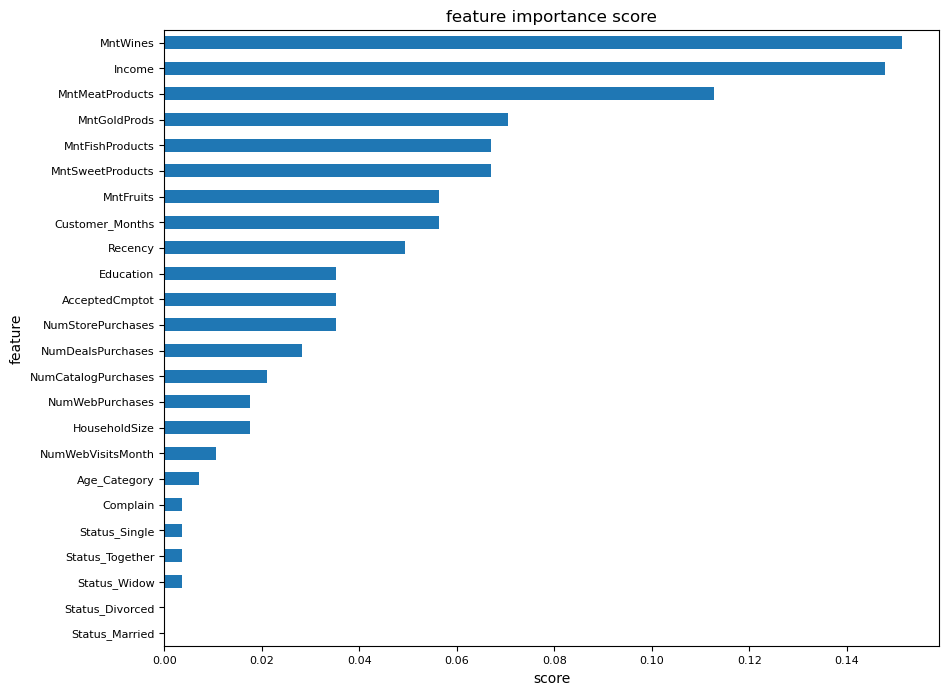

In [387]:
show_feature_importance(rs_ab.best_estimator_)

### Random Forest

In [1444]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
eval_classification2(rf)

Accuracy (Train Set): 0.99
Precision (Train Set): 0.96
Recall (Train Set): 1.00
F1-Score (Train Set): 0.98
Accuracy (Test Set): 0.86
Precision (Test Set): 0.50
Recall (Test Set): 0.59
F1-Score (Test Set): 0.54
roc_auc (test-proba): 0.87
roc_auc (train-proba): 1.00
roc_auc (crossval train): 0.9843041012216405
roc_auc (crossval test): 0.3476063829787234


In [1445]:
# tuning hyperparameter RF
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(1, 200, 50)]
criterion = ['gini', 'entropy']
max_depth = [int(x) for x in np.linspace(2, 100, 50)]
min_samples_split = [int(x) for x in np.linspace(2, 20, 10)]
min_samples_leaf = [int(x) for x in np.linspace(2, 20, 20)]
hyperparameters = dict(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth,
                       min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

rf = RandomForestClassifier(random_state=99)
rs_rf = RandomizedSearchCV(rf, hyperparameters, scoring='recall', random_state=99, cv=5)
rs_rf.fit(X_train, y_train)
eval_classification2(rs_rf)

Accuracy (Train Set): 0.98
Precision (Train Set): 0.89
Recall (Train Set): 1.00
F1-Score (Train Set): 0.94
Accuracy (Test Set): 0.86
Precision (Test Set): 0.51
Recall (Test Set): 0.59
F1-Score (Test Set): 0.55
roc_auc (test-proba): 0.88
roc_auc (train-proba): 1.00
roc_auc (crossval train): 0.8075425392670157
roc_auc (crossval test): 0.3434397163120567


In [1446]:
show_best_hyperparameter(rs_rf)

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 64, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 8, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 126, 'n_jobs': None, 'oob_score': False, 'random_state': 99, 'verbose': 0, 'warm_start': False}


In [1447]:
#learning curve
# param_values = [int(x) for x in np.linspace(1, 200, 50)] # n_estimators
# param_values = [int(x) for x in np.linspace(2, 100, 50)] # max_depth
# param_values = [int(x) for x in np.linspace(2, 20, 15)] # min_samples_split
param_values = [int(x) for x in np.linspace(2, 100, 50)] # min_samples_leaf

train_scores = []
test_scores = []

for c in param_values:
    model = RandomForestClassifier(n_estimators=126, min_samples_leaf=c)
    model.fit(X_train, y_train)

    # eval on train
    y_pred_proba_train = model.predict_proba(X_train)
    y_predict_prob_class_1_train = y_pred_proba_train[:,1]
    y_pred_train = [1 if prob > 0.3 else 0 for prob in y_predict_prob_class_1_train]
    train_precision = precision_score(y_train, y_pred_train)
    train_scores.append(train_precision)

    # eval on test
    y_pred_proba_test = model.predict_proba(X_test)
    y_predict_prob_class_1_test = y_pred_proba_test[:,1]
    y_pred_test = [1 if prob > 0.3 else 0 for prob in y_predict_prob_class_1_test]
    test_precision = precision_score(y_test, y_pred_test)
    test_scores.append(test_precision)

    print('param value: ' + str(c) + '; train: ' + str(train_precision) + '; test: '+ str(test_precision))

plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.xlabel('min_samples_leaf')
plt.ylabel('Precision')
plt.title('Learning Curve - Hyperparameter Precision - Random Forest')
plt.legend()
plt.show()

param value: 2; train: 0.9260700389105059; test: 0.4766355140186916
param value: 4; train: 0.8291814946619217; test: 0.49514563106796117
param value: 6; train: 0.7885304659498208; test: 0.5238095238095238
param value: 8; train: 0.7392857142857143; test: 0.5051546391752577
param value: 10; train: 0.7201492537313433; test: 0.5
param value: 12; train: 0.7234848484848485; test: 0.5204081632653061
param value: 14; train: 0.7007575757575758; test: 0.5057471264367817
param value: 16; train: 0.69921875; test: 0.5053763440860215
param value: 18; train: 0.6938775510204082; test: 0.5393258426966292
param value: 20; train: 0.6653696498054474; test: 0.5168539325842697
param value: 22; train: 0.6653061224489796; test: 0.5
param value: 24; train: 0.6569037656903766; test: 0.5
param value: 26; train: 0.6437246963562753; test: 0.5333333333333333
param value: 28; train: 0.6724890829694323; test: 0.5238095238095238
param value: 30; train: 0.6379310344827587; test: 0.4942528735632184
param value: 32; trai

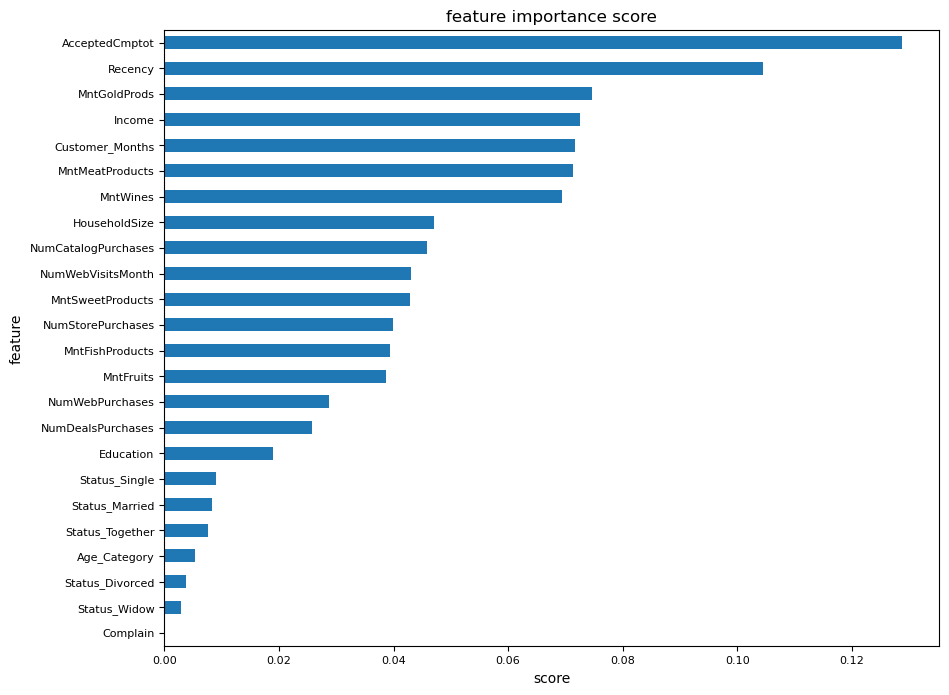

In [1449]:
show_feature_importance(rs_rf.best_estimator_)

#### modeling adaboost-tuning dengan top 10 fitur

In [1451]:
X_train_baru = X_train.drop(['Status_Widow', 'Status_Together', 'Status_Single', 'Status_Married', 'Status_Divorced', 'Age_Category', 'HouseholdSize',
                                        'AcceptedCmptot', 'Complain', 'NumWebVisitsMonth', 'NumStorePurchases','NumCatalogPurchases', 'NumWebPurchases',
                                        'NumDealsPurchases'], axis=1)
X_train_baru.columns

Index(['Education', 'Income', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'Customer_Months'],
      dtype='object')

In [1452]:
X_test_baru = X_test.drop(['Status_Widow', 'Status_Together', 'Status_Single', 'Status_Married', 'Status_Divorced', 'Age_Category', 'HouseholdSize',
                                        'AcceptedCmptot', 'Complain', 'NumWebVisitsMonth', 'NumStorePurchases','NumCatalogPurchases', 'NumWebPurchases',
                                        'NumDealsPurchases'], axis=1)
X_test_baru.columns

Index(['Education', 'Income', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'Customer_Months'],
      dtype='object')

In [1453]:
from sklearn.ensemble import AdaBoostClassifier
X_train = X_train_baru
X_test = X_test_baru

ab_baru = AdaBoostClassifier()
ab_baru.fit(X_train, y_train)
eval_classification(ab_baru)

Accuracy (Train Set): 0.88
Precision (Train Set): 0.68
Recall (Train Set): 0.42
F1-Score (Train Set): 0.52
Accuracy (Test Set): 0.86
Precision (Test Set): 0.51
Recall (Test Set): 0.21
F1-Score (Test Set): 0.30
roc_auc (test-proba): 0.79
roc_auc (train-proba): 0.91
roc_auc (crossval train): 0.4173702006980803
roc_auc (crossval test): 0.3217198581560284


In [1454]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
X_train = X_train_baru
X_test = X_test_baru

# List of hyperparameter
hyperparameters = dict(n_estimators = [int(x) for x in np.linspace(start = 50, stop = 1500, num = 1500)], # Jumlah iterasi
                       learning_rate = [float(x) for x in np.linspace(start = 0.001, stop = 2, num = 100)],
                       algorithm = ['SAMME', 'SAMME.R'])

# Init model
rs_ab_baru = AdaBoostClassifier(random_state=42)
rs_ab_baru = RandomizedSearchCV(rs_ab_baru, hyperparameters, random_state=42, cv=5, scoring='recall')
rs_ab_baru.fit(X_train,y_train)

# Predict & Evaluation
eval_classification(rs_ab_baru)

Accuracy (Train Set): 0.98
Precision (Train Set): 0.99
Recall (Train Set): 0.86
F1-Score (Train Set): 0.92
Accuracy (Test Set): 0.85
Precision (Test Set): 0.48
Recall (Test Set): 0.34
F1-Score (Test Set): 0.40
roc_auc (test-proba): 0.78
roc_auc (train-proba): 1.00
roc_auc (crossval train): 0.8691263089005237
roc_auc (crossval test): 0.35984042553191486


In [1455]:
show_best_hyperparameter(rs_ab_baru) # Check the best hyperparameter after tuning

{'algorithm': 'SAMME', 'base_estimator': 'deprecated', 'estimator': None, 'learning_rate': 1.7576969696969695, 'n_estimators': 1435, 'random_state': 42}


## DATA SMOTE

In [185]:
X_train_smote = X_train_smote.drop(['Kidhome', 'Teenhome'], axis=1)

In [186]:
X_train_smote.columns

Index(['Education', 'Income', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Complain', 'AcceptedCmptot', 'Customer_Months', 'HouseholdSize',
       'Age_Category', 'Status_Divorced', 'Status_Married', 'Status_Single',
       'Status_Together', 'Status_Widow'],
      dtype='object')

In [187]:
X_test.columns

Index(['Education', 'Income', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Complain', 'AcceptedCmptot', 'Customer_Months', 'HouseholdSize',
       'Age_Category', 'Status_Divorced', 'Status_Married', 'Status_Single',
       'Status_Together', 'Status_Widow'],
      dtype='object')

### Logistic Regression

In [1560]:
from sklearn.linear_model import LogisticRegression

X_train = X_train_smote
y_train = y_train_smote

lr_smote = LogisticRegression()
lr_smote.fit(X_train, y_train)
eval_classification(lr_smote)

Accuracy (Train Set): 0.87
Precision (Train Set): 0.89
Recall (Train Set): 0.85
F1-Score (Train Set): 0.87
Accuracy (Test Set): 0.85
Precision (Test Set): 0.46
Recall (Test Set): 0.56
F1-Score (Test Set): 0.50
roc_auc (test-proba): 0.85
roc_auc (train-proba): 0.95
roc_auc (crossval train): 0.8508277396218673
roc_auc (crossval test): 0.8397474819123281


In [1561]:
# tuning parameter dengan random search
X_train = X_train_smote
y_train = y_train_smote

import numpy as np
from sklearn.model_selection import RandomizedSearchCV
penalty = ['l1', 'l2', 'elasticnet', 'none']
C = [100, 10, 1.0, 0.1, 0.01]
Solver = ['lbfgs','newton-cg','liblinear','sag','saga']
hyperparameters = dict(penalty=penalty, C=C, solver=Solver)

lr_smote = LogisticRegression()
rs_lr_smote = RandomizedSearchCV(lr_smote, hyperparameters, scoring='recall', random_state=42, cv=5, n_iter=50)
rs_lr_smote.fit(X_train, y_train)
eval_classification(rs_lr_smote)

Accuracy (Train Set): 0.86
Precision (Train Set): 0.87
Recall (Train Set): 0.85
F1-Score (Train Set): 0.86
Accuracy (Test Set): 0.84
Precision (Test Set): 0.45
Recall (Test Set): 0.62
F1-Score (Test Set): 0.52
roc_auc (test-proba): 0.86
roc_auc (train-proba): 0.94
roc_auc (crossval train): 0.8557184942601094
roc_auc (crossval test): 0.8487757128670733


In [1562]:
show_best_hyperparameter(rs_lr_smote)

{'C': 0.1, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'saga', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [1563]:
# confusion matrix pada data test
X_train = X_train_smote
y_train = y_train_smote

from sklearn.metrics import confusion_matrix
rs_lr_smote.fit(X_train, y_train)
y_pred_test = rs_lr_smote.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(5, 5))
#sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,  fmt='.2%', cmap='GnBu')
ax = sns.heatmap(cf_matrix, annot=True,  fmt='.0f', cmap='crest', linewidth=.5)
ax.set(xlabel="predicted label", ylabel="true label")
ax.xaxis.set_label_position('top')
ax.xaxis.tick_top()
plt.show()

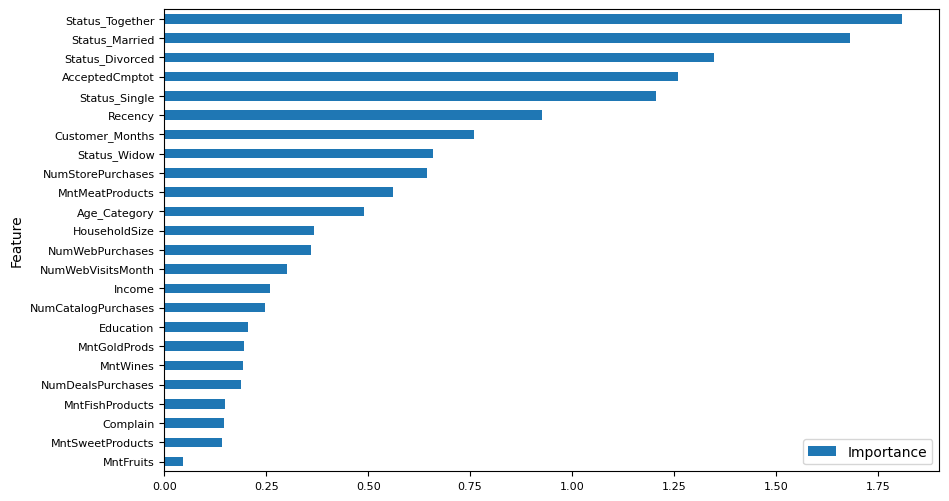

In [1564]:
# feature importance lr pakai best estimator
X_train = X_train_smote
y_train = y_train_smote

coefficients = rs_lr_smote.best_estimator_.coef_

avg_importance = np.mean(np.abs(coefficients), axis=0)
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': avg_importance})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))
plt.show()

### AdaBoost

In [1565]:
from sklearn.ensemble import AdaBoostClassifier
X_train = X_train_smote
y_train = y_train_smote

ab_smote = AdaBoostClassifier()
ab_smote.fit(X_train, y_train)
eval_classification(ab_smote)

Accuracy (Train Set): 0.92
Precision (Train Set): 0.92
Recall (Train Set): 0.92
F1-Score (Train Set): 0.92
Accuracy (Test Set): 0.86
Precision (Test Set): 0.51
Recall (Test Set): 0.58
F1-Score (Test Set): 0.54
roc_auc (test-proba): 0.86
roc_auc (train-proba): 0.98
roc_auc (crossval train): 0.926260972280183
roc_auc (crossval test): 0.8744077174067243


In [1566]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

X_train = X_train_smote
y_train = y_train_smote

# List of hyperparameter
hyperparameters = dict(n_estimators = [int(x) for x in np.linspace(start = 50, stop = 2000, num = 1500)], # Jumlah iterasi
                       learning_rate = [float(x) for x in np.linspace(start = 0.001, stop = 1.5, num = 100)],
                       algorithm = ['SAMME', 'SAMME.R'])

# Init model
ab_smote = AdaBoostClassifier(random_state=42)
rs_ab_smote = RandomizedSearchCV(ab_smote, hyperparameters, random_state=42, cv=5, scoring='recall') # random state = 42 best
rs_ab_smote.fit(X_train,y_train)

# Predict & Evaluation
eval_classification(rs_ab_smote)

Accuracy (Train Set): 0.93
Precision (Train Set): 0.93
Recall (Train Set): 0.93
F1-Score (Train Set): 0.93
Accuracy (Test Set): 0.88
Precision (Test Set): 0.57
Recall (Test Set): 0.60
F1-Score (Test Set): 0.58
roc_auc (test-proba): 0.87
roc_auc (train-proba): 0.98
roc_auc (crossval train): 0.95692571032473
roc_auc (crossval test): 0.8578777131508015


In [1567]:
show_best_hyperparameter(rs_ab_smote)

{'algorithm': 'SAMME', 'base_estimator': 'deprecated', 'estimator': None, 'learning_rate': 0.5460909090909092, 'n_estimators': 1202, 'random_state': 42}


In [1568]:
# predict pada data testing
y_pred = rs_ab_smote.predict(X_test)
y_pred_proba = rs_ab_smote.predict_proba(X_test)

In [1569]:
sum(y_pred)

100

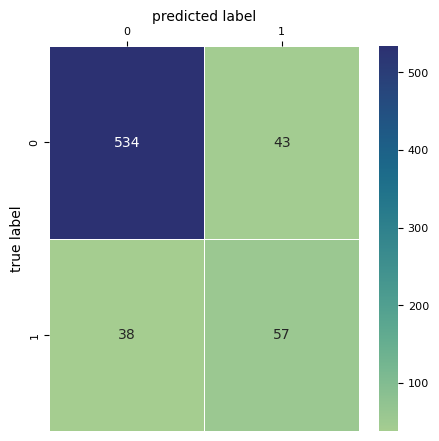

In [1570]:
# confusion matrix pada data test
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 5))
#sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,  fmt='.2%', cmap='GnBu')
ax = sns.heatmap(cf_matrix, annot=True,  fmt='.0f', cmap='crest', linewidth=.5)
ax.set(xlabel="predicted label", ylabel="true label")
ax.xaxis.set_label_position('top')
ax.xaxis.tick_top()
plt.show()

In [1571]:
show_feature_importance(rs_ab_smote.best_estimator_)

### Random Forest

In [188]:
from sklearn.ensemble import RandomForestClassifier
X_train = X_train_smote
y_train = y_train_smote

rf_smote = RandomForestClassifier(random_state=42)
rf_smote.fit(X_train, y_train)
eval_classification(rf_smote)

Accuracy (Train Set): 1.00
Precision (Train Set): 1.00
Recall (Train Set): 1.00
F1-Score (Train Set): 1.00
Accuracy (Test Set): 0.87
Precision (Test Set): 0.56
Recall (Test Set): 0.51
F1-Score (Test Set): 0.53
roc_auc (test-proba): 0.87
roc_auc (train-proba): 1.00
roc_auc (crossval train): 0.9981190629442847
roc_auc (crossval test): 0.9473570719250958


In [1573]:
# tuning hyperparameter RF
from sklearn.model_selection import RandomizedSearchCV
X_train = X_train_smote
y_train = y_train_smote

n_estimators = [int(x) for x in np.linspace(1, 200, 50)]
criterion = ['gini', 'entropy']
max_depth = [int(x) for x in np.linspace(2, 100, 50)]
min_samples_split = [int(x) for x in np.linspace(2, 20, 20)]
min_samples_leaf = [int(x) for x in np.linspace(2, 20, 20)]
hyperparameters = dict(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth,
                       min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

rf_smote = RandomForestClassifier(random_state=12)
rs_rf_smote = RandomizedSearchCV(rf_smote, hyperparameters, scoring='recall', random_state=12, cv=5)
rs_rf_smote.fit(X_train, y_train)
eval_classification(rs_rf_smote)

Accuracy (Train Set): 0.99
Precision (Train Set): 0.99
Recall (Train Set): 0.99
F1-Score (Train Set): 0.99
Accuracy (Test Set): 0.87
Precision (Test Set): 0.55
Recall (Test Set): 0.52
F1-Score (Test Set): 0.53
roc_auc (test-proba): 0.88
roc_auc (train-proba): 1.00
roc_auc (crossval train): 0.9898429045332051
roc_auc (crossval test): 0.936070364590722


In [1574]:
show_best_hyperparameter(rs_rf_smote)

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 54, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 135, 'n_jobs': None, 'oob_score': False, 'random_state': 12, 'verbose': 0, 'warm_start': False}


#### modeling adaboost-tuning-smote dengan top 10 fitur

In [1575]:
X_train_smote_baru = X_train_smote.drop(['Education', 'Income', 'MntFruits', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
                                  'NumWebVisitsMonth', 'Complain','Age_Category'], axis=1)
X_train_smote_baru.columns

Index(['Recency', 'MntWines', 'MntMeatProducts', 'MntFishProducts',
       'NumCatalogPurchases', 'NumStorePurchases', 'AcceptedCmptot',
       'Customer_Months', 'HouseholdSize', 'Status_Divorced', 'Status_Married',
       'Status_Single', 'Status_Together', 'Status_Widow'],
      dtype='object')

In [1576]:
X_test_smote_baru = X_test.drop(['Education', 'Income', 'MntFruits', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
                                  'NumWebVisitsMonth', 'Complain','Age_Category'], axis=1)
X_test_smote_baru.columns

Index(['Recency', 'MntWines', 'MntMeatProducts', 'MntFishProducts',
       'NumCatalogPurchases', 'NumStorePurchases', 'AcceptedCmptot',
       'Customer_Months', 'HouseholdSize', 'Status_Divorced', 'Status_Married',
       'Status_Single', 'Status_Together', 'Status_Widow'],
      dtype='object')

In [1577]:
from sklearn.ensemble import AdaBoostClassifier
X_train = X_train_smote_baru
y_train = y_train_smote
X_test = X_test_smote_baru

ab_smote_baru = AdaBoostClassifier()
ab_smote_baru.fit(X_train, y_train)
eval_classification(ab_smote_baru)

Accuracy (Train Set): 0.91
Precision (Train Set): 0.92
Recall (Train Set): 0.91
F1-Score (Train Set): 0.91
Accuracy (Test Set): 0.86
Precision (Test Set): 0.50
Recall (Test Set): 0.56
F1-Score (Test Set): 0.53
roc_auc (test-proba): 0.85
roc_auc (train-proba): 0.98
roc_auc (crossval train): 0.9125305031157385
roc_auc (crossval test): 0.8743963682791887


In [1578]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

X_train = X_train_smote_baru
y_train = y_train_smote
X_test = X_test_smote_baru

# List of hyperparameter
hyperparameters = dict(n_estimators = [int(x) for x in np.linspace(start = 50, stop = 1500, num = 1500)], # Jumlah iterasi
                       learning_rate = [float(x) for x in np.linspace(start = 0.001, stop = 2, num = 100)],
                       algorithm = ['SAMME', 'SAMME.R'])

# Init model
ab_smote_baru = AdaBoostClassifier(random_state=42)
rs_ab_smote_baru = RandomizedSearchCV(ab_smote_baru, hyperparameters, random_state=42, cv=5, scoring='recall')
rs_ab_smote_baru.fit(X_train,y_train)

# Predict & Evaluation
eval_classification(rs_ab_smote_baru)

Accuracy (Train Set): 0.92
Precision (Train Set): 0.92
Recall (Train Set): 0.92
F1-Score (Train Set): 0.92
Accuracy (Test Set): 0.87
Precision (Test Set): 0.53
Recall (Test Set): 0.58
F1-Score (Test Set): 0.55
roc_auc (test-proba): 0.87
roc_auc (train-proba): 0.98
roc_auc (crossval train): 0.9358573409063581
roc_auc (crossval test): 0.8420825649028231


## SHAP - Random Forest

In [189]:
from sklearn.ensemble import RandomForestClassifier
X_train = X_train_smote
y_train = y_train_smote

#rf_sh = RandomForestClassifier(random_state=42)
rf_smote.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [190]:
!pip install shap

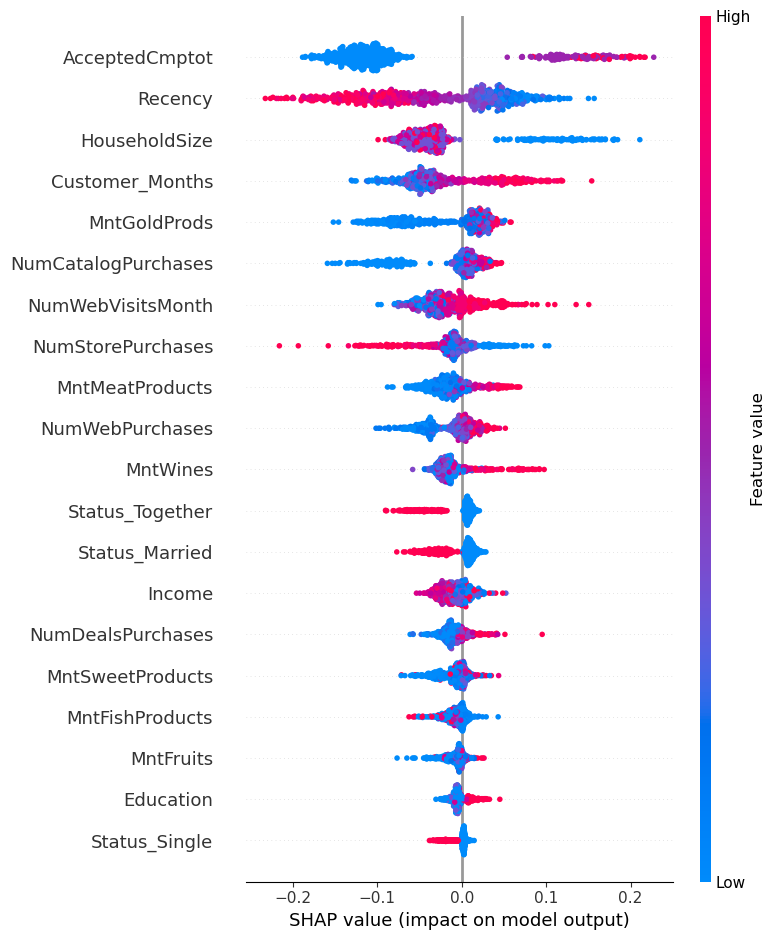

In [192]:
import shap
explainer = shap.TreeExplainer(rf_smote)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test) # Summary shap value terhadap label positive

In [193]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1][0], X_test.iloc[0,:])

## Perbandingan Revenue dengan metriks Recall dan Precision

### best method (AdaBoost - SMOTE - TUNING)

In [ ]:
#Accuracy (Train Set): 0.93
#Precision (Train Set): 0.93
#Recall (Train Set): 0.93
#F1-Score (Train Set): 0.93
#Accuracy (Test Set): 0.88
#Precision (Test Set): 0.56
#Recall (Test Set): 0.57
#F1-Score (Test Set): 0.56
#roc_auc (test-proba): 0.87
#roc_auc (train-proba): 0.99
#roc_auc (crossval train): 0.9868027795452796
#roc_auc (crossval test): 0.9700443725287116

#Metode Adaboost tanpa SMOTE dan Hyperparameter tuning
def hitung_keuntungan_recall(recall, biaya_kampanye, pendapatan_pelanggan, jumlah_pelanggan):
    # Menghitung pendapatan yang diharapkan dari pelanggan yang menerima kampanye berdasarkan recall
    pendapatan = (pendapatan_pelanggan * recall * jumlah_pelanggan) - (biaya_kampanye * jumlah_pelanggan)

    return pendapatan

def hitung_keuntungan_precision(presisi, biaya_kampanye, pendapatan_pelanggan, jumlah_pelanggan):
    # Menghitung jumlah pelanggan yang menerima kampanye berdasarkan presisi
    jumlah_pelanggan_menerima = jumlah_pelanggan * presisi

    # Menghitung pendapatan yang diharapkan dari pelanggan yang menerima kampanye berdasarkan presisi
    pendapatan = jumlah_pelanggan_menerima * (pendapatan_pelanggan - biaya_kampanye)

    return pendapatan

# Parameter yang diberikan
accuracy_train = 0.93
precision_train = 0.93
recall_train = 0.93
accuracy_test = 0.88
precision_test = 0.56
recall_test = 0.57

# Menentukan biaya kampanye dan pendapatan per pelanggan
biaya_kampanye = 3
pendapatan_pelanggan = 11

# Menghitung jumlah pelanggan pada dataset test (672 entri)
jumlah_pelanggan = 672

# Menghitung keuntungan berdasarkan recall pada dataset train
keuntungan_recall_train = hitung_keuntungan_recall(recall_train, biaya_kampanye, pendapatan_pelanggan, jumlah_pelanggan)

# Menghitung keuntungan berdasarkan presisi pada dataset train
keuntungan_precision_train = hitung_keuntungan_precision(precision_train, biaya_kampanye, pendapatan_pelanggan, jumlah_pelanggan)

# Menghitung keuntungan berdasarkan recall pada dataset test
keuntungan_recall_test = hitung_keuntungan_recall(recall_test, biaya_kampanye, pendapatan_pelanggan, jumlah_pelanggan)

# Menghitung keuntungan berdasarkan presisi pada dataset test
keuntungan_precision_test = hitung_keuntungan_precision(precision_test, biaya_kampanye, pendapatan_pelanggan, jumlah_pelanggan)

# Menampilkan hasil
print("Keuntungan berdasarkan Recall pada Dataset Train: $", keuntungan_recall_train)
print("Keuntungan berdasarkan Precision pada Dataset Train: $", keuntungan_precision_train)
print("Keuntungan berdasarkan Recall pada Dataset Test: $", keuntungan_recall_test)
print("Keuntungan berdasarkan Precision pada Dataset Test: $", keuntungan_precision_test)

### Adaboost Tanpa SMOTE

In [ ]:
#Metode Adaboost tanpa SMOTE dan Hyperparameter tuning
def hitung_keuntungan_recall(recall, biaya_kampanye, pendapatan_pelanggan, jumlah_pelanggan):
    # Menghitung pendapatan yang diharapkan dari pelanggan yang menerima kampanye berdasarkan recall
    pendapatan = (pendapatan_pelanggan * recall * jumlah_pelanggan) - (biaya_kampanye * jumlah_pelanggan)

    return pendapatan

def hitung_keuntungan_precision(presisi, biaya_kampanye, pendapatan_pelanggan, jumlah_pelanggan):
    # Menghitung jumlah pelanggan yang menerima kampanye berdasarkan presisi
    jumlah_pelanggan_menerima = jumlah_pelanggan * presisi

    # Menghitung pendapatan yang diharapkan dari pelanggan yang menerima kampanye berdasarkan presisi
    pendapatan = jumlah_pelanggan_menerima * (pendapatan_pelanggan - biaya_kampanye)

    return pendapatan

# Parameter yang diberikan
accuracy_train = 0.92
precision_train = 0.79
recall_train = 0.64
f1_score_train = 0.71
accuracy_test = 0.89
precision_test = 0.67
recall_test = 0.48

# Menentukan biaya kampanye dan pendapatan per pelanggan
biaya_kampanye = 3
pendapatan_pelanggan = 11

# Menghitung jumlah pelanggan pada dataset test (672 entri)
jumlah_pelanggan = 672

# Menghitung keuntungan berdasarkan recall pada dataset train
keuntungan_recall_train = hitung_keuntungan_recall(recall_train, biaya_kampanye, pendapatan_pelanggan, jumlah_pelanggan)

# Menghitung keuntungan berdasarkan presisi pada dataset train
keuntungan_precision_train = hitung_keuntungan_precision(precision_train, biaya_kampanye, pendapatan_pelanggan, jumlah_pelanggan)

# Menghitung keuntungan berdasarkan recall pada dataset test
keuntungan_recall_test = hitung_keuntungan_recall(recall_test, biaya_kampanye, pendapatan_pelanggan, jumlah_pelanggan)

# Menghitung keuntungan berdasarkan presisi pada dataset test
keuntungan_precision_test = hitung_keuntungan_precision(precision_test, biaya_kampanye, pendapatan_pelanggan, jumlah_pelanggan)

# Menampilkan hasil
print("Keuntungan berdasarkan Recall pada Dataset Train: $", keuntungan_recall_train)
print("Keuntungan berdasarkan Precision pada Dataset Train: $", keuntungan_precision_train)
print("Keuntungan berdasarkan Recall pada Dataset Test: $", keuntungan_recall_test)
print("Keuntungan berdasarkan Precision pada Dataset Test: $", keuntungan_precision_test)

### Random Forest tanpa SMOTE

In [ ]:
#Metode Random Forest tanpa SMOTE dan Hyperparameter Tuning
def hitung_keuntungan_recall(recall, biaya_kampanye, pendapatan_pelanggan, jumlah_pelanggan):
    # Menghitung pendapatan yang diharapkan dari pelanggan yang menerima kampanye berdasarkan recall
    pendapatan = (pendapatan_pelanggan * recall * jumlah_pelanggan) - (biaya_kampanye * jumlah_pelanggan)

    return pendapatan
def hitung_keuntungan_precision(presisi, biaya_kampanye, pendapatan_pelanggan, jumlah_pelanggan):
    # Menghitung jumlah pelanggan yang menerima kampanye berdasarkan presisi
    jumlah_pelanggan_menerima = jumlah_pelanggan * presisi

    # Menghitung pendapatan yang diharapkan dari pelanggan yang menerima kampanye berdasarkan presisi
    pendapatan = jumlah_pelanggan_menerima * (pendapatan_pelanggan - biaya_kampanye)

    return pendapatan

# Parameter yang diberikan
accuracy_train = 0.99
precision_train = 0.98
recall_train = 0.98
f1_score_train = 0.98
accuracy_test = 0.88
precision_test = 0.68
recall_test = 0.29
f1_score_test = 0.41

# Menentukan biaya kampanye dan pendapatan per pelanggan
biaya_kampanye = 3
pendapatan_pelanggan = 11

# Menghitung jumlah pelanggan pada dataset test (672 entri)
jumlah_pelanggan = 672

# Menghitung keuntungan berdasarkan recall pada dataset train
keuntungan_recall_train = hitung_keuntungan_recall(recall_train, biaya_kampanye, pendapatan_pelanggan, jumlah_pelanggan)

# Menghitung keuntungan berdasarkan presisi pada dataset train
keuntungan_precision_train = hitung_keuntungan_precision(precision_train, biaya_kampanye, pendapatan_pelanggan, jumlah_pelanggan)

# Menghitung keuntungan berdasarkan recall pada dataset test
keuntungan_recall_test = hitung_keuntungan_recall(recall_test, biaya_kampanye, pendapatan_pelanggan, jumlah_pelanggan)

# Menghitung keuntungan berdasarkan presisi pada dataset test
keuntungan_precision_test = hitung_keuntungan_precision(precision_test, biaya_kampanye, pendapatan_pelanggan, jumlah_pelanggan)

# Menampilkan hasil
print("Keuntungan berdasarkan Recall pada Dataset Train: $", keuntungan_recall_train)
print("Keuntungan berdasarkan Precision pada Dataset Train: $", keuntungan_precision_train)
print("Keuntungan berdasarkan Recall pada Dataset Test: $", keuntungan_recall_test)
print("Keuntungan berdasarkan Precision pada Dataset Test: $", keuntungan_precision_test)

### Logistic Regression Tanpa SMOTE

In [ ]:
#Metode Random Forest tanpa SMOTE dan Hyperparameter Tuning
def hitung_keuntungan_recall(recall, biaya_kampanye, pendapatan_pelanggan, jumlah_pelanggan):
    # Menghitung pendapatan yang diharapkan dari pelanggan yang menerima kampanye berdasarkan recall
    pendapatan = (pendapatan_pelanggan * recall * jumlah_pelanggan) - (biaya_kampanye * jumlah_pelanggan)

    return pendapatan
def hitung_keuntungan_precision(presisi, biaya_kampanye, pendapatan_pelanggan, jumlah_pelanggan):
    # Menghitung jumlah pelanggan yang menerima kampanye berdasarkan presisi
    jumlah_pelanggan_menerima = jumlah_pelanggan * presisi

    # Menghitung pendapatan yang diharapkan dari pelanggan yang menerima kampanye berdasarkan presisi
    pendapatan = jumlah_pelanggan_menerima * (pendapatan_pelanggan - biaya_kampanye)

    return pendapatan

# Parameter yang diberikan
accuracy_train = 0.89
precision_train = 0.74
recall_train = 0.48
accuracy_test = 0.89
precision_test = 0.74
recall_test = 0.39

# Menentukan biaya kampanye dan pendapatan per pelanggan
biaya_kampanye = 3
pendapatan_pelanggan = 11

# Menghitung jumlah pelanggan pada dataset test (672 entri)
jumlah_pelanggan = 672

# Menghitung keuntungan berdasarkan recall pada dataset train
keuntungan_recall_train = hitung_keuntungan_recall(recall_train, biaya_kampanye, pendapatan_pelanggan, jumlah_pelanggan)

# Menghitung keuntungan berdasarkan presisi pada dataset train
keuntungan_precision_train = hitung_keuntungan_precision(precision_train, biaya_kampanye, pendapatan_pelanggan, jumlah_pelanggan)

# Menghitung keuntungan berdasarkan recall pada dataset test
keuntungan_recall_test = hitung_keuntungan_recall(recall_test, biaya_kampanye, pendapatan_pelanggan, jumlah_pelanggan)

# Menghitung keuntungan berdasarkan presisi pada dataset test
keuntungan_precision_test = hitung_keuntungan_precision(precision_test, biaya_kampanye, pendapatan_pelanggan, jumlah_pelanggan)

# Menampilkan hasil
print("Keuntungan berdasarkan Recall pada Dataset Train: $", keuntungan_recall_train)
print("Keuntungan berdasarkan Precision pada Dataset Train: $", keuntungan_precision_train)
print("Keuntungan berdasarkan Recall pada Dataset Test: $", keuntungan_recall_test)
print("Keuntungan berdasarkan Precision pada Dataset Test: $", keuntungan_precision_test)

# END